<a href="https://colab.research.google.com/github/navneetkrc/Open_LLM_Apps/blob/main/QA_Generations/QA_Generation_for_TVs_from_Support_Docs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




## Extracting text from PDFs using pymupdf4llm

In [1]:
!pip install pymupdf4llm==0.0.17 > /dev/null 2>&1

In [ ]:
# !wget https://downloadcenter.samsung.com/content/UM/202501/20250124164253078/SM-S93X_UG_EU_15_Eng_Rev.1.0_250123.pdf

In [ ]:
# !wget https://downloadcenter.samsung.com/content/UM/202212/20221216130939356/FDR_RF8000B_DA68-04402B-01_EN_MES_CFR.pdf

In [ ]:
# !wget https://downloadcenter.samsung.com/content/UM/202410/20241031092433781/OID77126_IB_D-PJT_WASHER-AD_SimpleUX_EN_241010.pdf

In [ ]:
# !wget https://downloadcenter.samsung.com/content/UM/202412/20241216101040745/O_12._FULL_NV7B5645TAS_U3_DG68_01412C_01_EN.pdf

In [2]:
!wget https://downloadcenter.samsung.com/content/UM/202411/20241109165750001/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826.0.pdf

--2025-03-08 21:20:06--  https://downloadcenter.samsung.com/content/UM/202411/20241109165750001/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826.0.pdf
Resolving downloadcenter.samsung.com (downloadcenter.samsung.com)... 23.79.27.41
Connecting to downloadcenter.samsung.com (downloadcenter.samsung.com)|23.79.27.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4306527 (4.1M) [application/pdf]
Saving to: ‘BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826.0.pdf’

BN81-25561C-620_EUG 100%[===================>]   4.11M  --.-KB/s    in 0.1s    

2025-03-08 21:20:06 (40.2 MB/s) - ‘BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826.0.pdf’ saved [4306527/4306527]



In [3]:
import os

# Define the old and new file paths
old_file_path = '/content/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826.0.pdf'
new_file_path = '/content/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826_0.pdf'

# Rename the file using os.rename()
os.rename(old_file_path, new_file_path)

print(f"File renamed from '{old_file_path}' to '{new_file_path}'")

File renamed from '/content/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826.0.pdf' to '/content/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826_0.pdf'


In [4]:
import pymupdf4llm

markdwon_text = pymupdf4llm.to_markdown('/content/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826_0.pdf')
#Samsung Series 5 Dual Cook Flex NV7B5750TAK Electric Pyrolytic Smart Oven - Black

Processing /content/BN81-25561C-620_EUG_ROPDVBEUD_EU_ENG_240826_0.pdf...
[                                        ] (0/280)[                                        ] (  1/280)[                                        ] (  2/280)[                                        ] (  3/280)[                                        ] (  4/280)[                                        ] (  5/280)[      

In [5]:
generated_text = markdwon_text
content = markdwon_text
generated_text

'# User guide\n\n###### Thank you for purchasing this Samsung product. To receive more complete service, please register your product at\n\n www.samsung.com\n\n Model Serial No.\n\n To directly go to the page that provides instructions on how to use the manual for visually impaired users, select the Menu Learning Screen link below. "Menu Learning Screen" Link\n\n\n-----\n\n### Contents\n\n##### Guide\n\nConnections\n\n6 Connection Guide\n\n8 Connecting an Antenna (Aerial)\n\n9 Connecting to the network\n\n13 Displaying your mobile device screen on the TV\n\n15 Connection Cables for External Devices\n\n17 Switching between external devices connected to the TV\n\n19 Connection Notes\n\nRemote Control and Peripherals\n\n22 About the Samsung Smart Remote (QLED TV/The\n\nFrame/The Serif/S8*D/S9*D/S8*C/S9*C/CU8/DU8/DU9\nSeries/CU77**/DU77** model)\n\n24 About the Remote Control (CU6/DU6/CU7/DU7/BEC/BED\n\nSeries)(except for CU77**/DU77** model)\n\n26 About the Samsung Smart Remote (The Terra

In [6]:
def test_qa_generators(base_function_name, content, suffixes=["", "_deepseek", "_google", "_sonnet"]):
    """Tests and prints output for different QA generation functions."""
    for suffix in suffixes:
        function_name = base_function_name + suffix
        try:
            qa_function = globals()[function_name] # Get function from global scope
            print(f"\n--- Calling {function_name} ---")
            qa_output = qa_function(content)
            print(qa_output)
        except KeyError:
            print(f"\n--- Function {function_name} not found ---")
        except Exception as e:
            print(f"\n--- Error in {function_name} ---")
            print(f"Error details: {e}")



In [7]:
def test_qa_generators_aggregated(base_function_name, content, suffixes=["", "_deepseek", "_google", "_sonnet"]):
    """
    Tests different QA generation functions and returns aggregated results in a single JSON structure.

    Args:
        base_function_name (str): Base name of the QA generation function
        content (str): Content to process
        suffixes (list): List of suffixes for different model variants

    Returns:
        dict: Aggregated results with the following structure:
        {
            "base_function": str,
            "results": {
                "model_variant": result_dict,
                ...
            },
            "errors": {
                "model_variant": error_message,
                ...
            }
        }
    """
    aggregated_results = {
        "base_function": base_function_name,
        "results": {},
        "errors": {}
    }

    for suffix in suffixes:
        function_name = base_function_name + suffix
        model_variant = suffix if suffix else "default"

        try:
            qa_function = globals()[function_name]  # Get function from global scope
            qa_output = qa_function(content)
            aggregated_results["results"][model_variant] = qa_output

        except KeyError:
            error_msg = f"Function {function_name} not found"
            aggregated_results["errors"][model_variant] = error_msg

        except Exception as e:
            error_msg = f"Error in execution: {str(e)}"
            aggregated_results["errors"][model_variant] = error_msg

    return aggregated_results

# Example usage and pretty printing
import json

def print_aggregated_results(results):
    """Helper function to pretty print the aggregated results."""
    print(json.dumps(results, indent=2))

## QA Pair Generation using Gemini *API*



In [8]:
import google.generativeai as genai
from google.colab import userdata
apikey=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=apikey)

### Number 1 generate_simple_qa_pairs

In [9]:
#original
def generate_simple_qa_pairs(text):
    """General informative Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate fundamental Q&A pairs from Samsung support docs covering:
    - Key features - Basic troubleshooting - Usage guidelines
    Use consumer-friendly language with concise answers (1-2 sentences).
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent
import google.generativeai as genai

def generate_simple_qa_pairs_deepseek(text):
    """Generates Q&A pairs in a standardized JSON format.

    Returns:
        A JSON object with nested "Generations", "Questions", and "Answers".
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate Q&A pairs from the Samsung support document below.
    Follow these rules:
    1. Include key features, troubleshooting steps, and usage guidelines.
    2. Use short, conversational questions and answers (1-2 sentences).
    3. Format output as JSON with a "Generations" key containing a list of Q&A objects.
    4. Structure each object as {{"Question": "...", "Answer": "..."}}.

    Example:
    {{
      "Generations": [
        {{"Question": "How do I restart my Galaxy phone?", "Answer": "Hold the power and volume down buttons for 10 seconds."}},
        {{"Question": "How to extend battery life?", "Answer": "Enable Power Saving Mode in Settings > Battery."}}
      ]
    }}

    Text: {text}
    """)

    response = model.generate_content(prompt).text
    # Remove markdown formatting (common in Gemini outputs)
    response = response.strip("` \n").replace("json", "")
    return json.loads(response)


#Google AI STudio
import google.generativeai as genai
from textwrap import dedent
import json

def generate_simple_qa_pairs_google(text):
    """
    Generates informative Q&A pairs from Samsung support docs and returns them in JSON format.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate fundamental Question and Answer pairs from the following Samsung support document text.
    Focus on:
    - Key features
    - Basic troubleshooting steps
    - Usage guidelines

    Format each question and answer pair clearly. Aim for consumer-friendly language and keep answers concise (1-2 sentences).

    Present the output as a list of dictionaries. Each dictionary should have the keys "Question" and "Answer".

    Text: {text}

    Output Format:
    [
      {{"Question": "...", "Answer": "..."}},
      {{"Question": "...", "Answer": "..."}},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        qa_list = json.loads(response_text) # Attempt to parse the response as JSON
    except json.JSONDecodeError:
        # If direct JSON parsing fails, fallback to a more robust extraction method
        print("Warning: Failed to parse JSON directly. Attempting to extract Q&A pairs from text.")
        # This fallback is a basic example, you might need more sophisticated parsing
        qa_list = []
        lines = response_text.strip().split('\n')
        for i in range(0, len(lines), 2): # Assuming Q and A alternate lines
            if i + 1 < len(lines):
                question = lines[i].strip().replace("Question:", "").strip() if "Question:" in lines[i] else lines[i].strip()
                answer = lines[i+1].strip().replace("Answer:", "").strip() if "Answer:" in lines[i+1] else lines[i+1].strip()
                qa_list.append({"Question": question, "Answer": answer})


    # Structure the output in the desired JSON format
    output_json = {
        "Generations": [
            {
                "Questions": [qa_pair["Question"] for qa_pair in qa_list],
                "Answers": [qa_pair["Answer"] for qa_pair in qa_list]
            }
        ]
    }
    return json.dumps(output_json, indent=2) # Return JSON string with indent for readability


#Sonnet
def generate_simple_qa_pairs_sonnet(text):
    """Generate structured Q&A pairs in JSON format"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate comprehensive Q&A pairs from Samsung support docs in strict JSON format:
    {{
      "Generations": {{
        "Questions": [
          "question1",
          "question2"
        ],
        "Answers": [
          "answer1",
          "answer2"
        ],
        "Metadata": {{
          "source": "Samsung support document",
          "coverage": ["features", "troubleshooting", "usage"]
        }}
      }}
    }}

    Criteria:
    - Generate 3-5 questions
    - Answers in 1-2 concise sentences
    - Use consumer-friendly language
    - Ensure direct mapping between questions and answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        # Fallback parsing if direct JSON parsing fails
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }


In [10]:
# Example Usage:
print("--- Simple Question-Answer Pairs ---")
test_qa_generators("generate_simple_qa_pairs", content)

--- Simple Question-Answer Pairs ---

--- Calling generate_simple_qa_pairs ---
Okay, here's the Q&A based on the Samsung support document, focusing on key features, troubleshooting, and usage guidelines, using consumer-friendly language and concise answers:

**Key Features**

*   **Q: What is Smart Hub?**
    *   **A:** Smart Hub is your central hub for accessing apps, streaming services, games, and more on your Samsung TV. It allows you to easily browse and enjoy a wide range of content.

*   **Q: What is Ambient Mode?**
    *   **A:** Ambient Mode transforms your TV into a decorative display when you're not watching it. You can show artwork, photos, or useful information like weather and time.

*   **Q: Can I control other devices with my Samsung TV remote?**
    *   **A:** Yes, you can often control compatible external devices like Blu-ray players and set-top boxes with your Samsung remote using Anynet+ (HDMI-CEC) or the Universal Remote Setup.

*   **Q: What is Multi View?**
    * 

In [11]:
results = test_qa_generators_aggregated("generate_simple_qa_pairs", content)
print_aggregated_results(results)

{
  "base_function": "generate_simple_qa_pairs",
  "results": {
    "default": "Okay, here are fundamental Q&A pairs, crafted from the provided Samsung support documentation, focusing on key features, basic troubleshooting, and usage guidelines, all in consumer-friendly language:\n\n**Key Features**\n\n*   **Q: What is Smart Hub?**\n    *   A: Smart Hub is the central interface on your Samsung TV that lets you access apps, streaming services, games, and more. It brings all your entertainment options together in one place.\n\n*   **Q: What is Ambient Mode/Art Mode?**\n    *   A: Ambient Mode (or Art Mode on The Frame) allows your TV to display useful information like weather or beautiful artwork when you're not actively watching. It transforms your TV into a decorative piece.\n\n*   **Q: What is Multi View?**\n    *   A: Multi View lets you watch multiple content sources simultaneously on your TV screen, for example, watch TV while screen sharing your phone.\n       Some models support 

### Number 2 generate_structured_qa

In [12]:
#original
def generate_structured_qa(text):
    """Problem-solution focused pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create problem-solution pairs from Samsung docs. Format:
    Question: [Issue description]
    Answer: [Step-by-step fix]
    Include severity indicators (⚠️) for critical issues.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_structured_qa_deepseek(text):
    """Generates severity-graded troubleshooting pairs in JSON format.

    Returns:
        JSON with error codes, time estimates, and step-by-step instructions.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Convert Samsung support text into problem-solution pairs with:
    1. Technical error codes (if applicable)
    2. Severity grading (Critical/Medium/Low)
    3. Estimated troubleshooting time
    4. Ordered resolution steps

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Issue]",
        "Answer": {{
          "Steps": ["1. Do X", "2. Then Y"],
          "SeverityCode": 0-2 (2=Critical),
          "ErrorCode": "ERR_BATT_01",
          "TroubleshootingTime": "5-7 minutes"
        }}
      }}
    - Replace ⚠️ with "SeverityCode":2
    - Sort by descending SeverityCode

    Example:
    {{
      "Generations": [
        {{
          "Question": "Phone overheating during charging",
          "Answer": {{
            "Steps": ["1. Unplug immediately", "2. Remove case", "3. Contact support"],
            "SeverityCode": 2,
            "ErrorCode": "ERR_CHG_OVERHEAT",
            "TroubleshootingTime": "3 minutes"
          }}
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse troubleshooting data"}


#Google AI STudio
def generate_structured_qa_google(text):
    """Problem-solution focused pairs in JSON format with severity indicators"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate problem-solution Question and Answer pairs from the following Samsung support document text. Format each pair as:

    Question: [Issue description]
    Answer: [Step-by-step fix]

    For critical issues, include a severity indicator (⚠️) in the output and classify them as "Critical" in the JSON structure. For non-critical issues, classify as "Normal" or leave severity blank/null.

    Use consumer-friendly language. Keep answers concise and step-by-step where possible.

    Present the output as a list of dictionaries in JSON format. Each dictionary should have keys: "Severity" (e.g., "Critical", "Normal", null), "Question", "Answer", and optionally "SeverityIndicator" (the ⚠️ symbol if applicable).

    Text: {text}

    Output Format (example):
    [
      {{ "Severity": "Critical", "Question": "...", "Answer": "...", "SeverityIndicator": "⚠️" }},
      {{ "Severity": "Normal", "Question": "...", "Answer": "...", "SeverityIndicator": null }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        problem_solution_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        problem_solution_data = [] # Implement a robust fallback text parsing

    output_json = {
        "Generations": [
            {"ProblemSolutionPairs": problem_solution_data} # Assuming model outputs list of dictionaries as requested
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_structured_qa_sonnet(text):
    """Generate problem-solution Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate problem-solution Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Specific problem description"
        ],
        "Answers": [
          "Comprehensive step-by-step solution"
        ],
        "Metadata": {{
          "IssueSeverity": ["Low", "Medium", "High"],
          "SolutionComplexity": "Detailed technical guidance"
        }},
        "IssueClassification": {{
          "CriticalIssues": ["Urgent problems requiring immediate action"],
          "WarningIndicators": ["⚠️ Severity markers"]
        }}
      }}
    }}

    Requirements:
    - Precise problem descriptions
    - Clear, sequential solution steps
    - Include severity indicators
    - 1-2 sentence answers
    - Technical accuracy

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }


In [13]:
# Example Usage:
print("--- generate_structured_qa ---")
test_qa_generators("generate_structured_qa", content)

--- generate_structured_qa ---

--- Calling generate_structured_qa ---
```
Question: The screen is flashing or has become dark. (⚠️ Severity: High - Critical viewing impairment)
Answer: 1. Disable Brightness Optimisation, Energy Saving Solution, Motion Lighting, or Contrast Enhancer. 2. Run Picture Test to check if the issue is with the TV or the connected device.
Question: The picture is not bright, or the picture colours do not look clear.
Answer: 1. Reset Picture. 2. Disable Brightness Optimisation and Energy Saving Solution. 3. Adjust Picture Mode, Contrast, Brightness, Sharpness, Colour and Tint settings.
Question: The picture colours are black and white or do not look the way they should look.
Answer: 1. Run Picture Test. 2. Check component cable connections (Y, Pb, Pr). 3. Verify that Greyscale is not turned on.
Question: The TV automatically turns off by itself.
Answer: 1. Disable Sleep Timer. 2. Disable Auto Power Off or Off Timer.
Question: TV (The Frame TV) cannot be turned 

### Number 3 generate_step_by_step_qa

In [14]:
#original
def generate_step_by_step_qa(text):
    """Procedural guidance pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Extract step-by-step procedures and generate Q&A pairs with:
    - Sequential questions - Tool requirements - Time estimates
    Format steps with numbered sub-items.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_step_by_step_qa_deepseek(text):
    """Generates machine-parseable procedural guides with safety checks.

    Returns:
        JSON with nested step details, tool SKUs, and critical warnings.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Convert Samsung technical docs into structured Q&A with:
    1. Sequentially ordered repair/configuration steps
    2. Official tool SKUs from Samsung Parts
    3. Time estimates with ranges (e.g., "8-12 minutes")
    4. Critical warnings for permanent data loss

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Task description]",
        "Answer": {{
          "Steps": [
            {{
              "Number": 1,
              "Action": "...",
              "Tools": ["GJ-TX42 (SIM ejector)"],
              "Warning": "Optional text"
            }}
          ],
          "TotalTime": "15-20 mins",
          "RiskLevel": "High/Medium/Low"
        }},
        "Category": "Display/Battery/Software"
      }}
    - Sort steps by dependency (prerequisite first)
    - Validate tool SKUs against Samsung's GJ-XXXXX format

    Example:
    {{
      "Generations": [
        {{
          "Question": "How to replace Galaxy S24 Ultra screen?",
          "Answer": {{
            "Steps": [
              {{
                "Number": 1,
                "Action": "Heat edges at 85°C with GJ-HX90 thermal pad",
                "Tools": ["GJ-HX90"],
                "Warning": "Exceeding 90°C voids warranty"
              }}
            ],
            "TotalTime": "45-60 mins",
            "RiskLevel": "High"
          }},
          "Category": "Display"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse procedural guide"}


#Google AI STudio
def generate_step_by_step_qa_google(text):
    """Procedural guidance pairs in JSON format with steps, tools, and time estimates"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Extract step-by-step procedures from the following Samsung support document text and generate Question and Answer pairs for each step.

    For each procedure, identify:
    - Sequential questions that guide the user through each step.
    - Any tool requirements needed for the procedure.
    - An estimated time to complete the procedure.

    Format the steps as numbered sub-items in the plain text output for clarity. In the JSON output, represent steps as a numbered list of Question-Answer pairs.

    Use consumer-friendly language. Keep answers concise and focused on each step.

    Present the output as a list of procedures in JSON format. Each procedure should include "ProcedureName", "ToolRequirements", "TimeEstimate", and a list of "Steps", where each step has "StepNumber", "Question", and "Answer".

    Text: {text}

    Output Format (example structure):
    [
      {{
        "ProcedureName": "Procedure Title",
        "ToolRequirements": ["Tool 1", "Tool 2", ...],
        "TimeEstimate": "Estimated Time",
        "Steps": [
          {{ "StepNumber": 1, "Question": "Question for Step 1?", "Answer": "Answer for Step 1" }},
          {{ "StepNumber": 2, "Question": "Question for Step 2?", "Answer": "Answer for Step 2" }},
          ...
        ]
      }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        procedure_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        procedure_data = [] # Implement a robust fallback text parsing

    output_json = {
        "Generations": [
            {"ProcedureQAPairs": procedure_data} # Assuming model outputs list of procedures as requested
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_step_by_step_qa_sonnet(text):
    """Generate structured procedural guidance Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create step-by-step Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Procedural guidance question"
        ],
        "Answers": [
          "Detailed step-by-step procedure"
        ],
        "Metadata": {{
          "ProcedureType": "Sequential Guidance",
          "Complexity": "Detailed Technical Steps"
        }},
        "ProcedureDetails": {{
          "Tools": ["Required equipment"],
          "TimeEstimates": ["Estimated duration for each step"],
          "Steps": [
            "Numbered sequential instructions"
          ]
        }}
      }}
    }}

    Requirements:
    - Numbered, sequential steps
    - Tool and time requirement details
    - 1-2 sentence answers
    - Technical precision

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [15]:
# Example Usage:
print("--- generate_step_by_step_qa ---")
test_qa_generators("generate_step_by_step_qa", content)

--- generate_step_by_step_qa ---

--- Calling generate_step_by_step_qa ---
Okay, here are the step-by-step procedures extracted from the provided text, formatted with numbered sub-items, and accompanied by sequential Q&A pairs addressing tool requirements and time estimates:

**1. Setting up a Wired Network Connection:**

1.  Go to Settings.
    - **Q:**  Where do I find the Settings menu?
    - **A:** (left directional button) Settings All Settings Connection Network Open Network Settings
2.  Select All Settings.
3.  Select Connection.
4.  Select Network.
5.  Select Open Network Settings.
6.  Select Wired.
7.  Connect a LAN cable to the TV and the router.
    - **Q:** What kind of LAN cable do I need?
    - **A:** Use a CAT 7 (*STP type) cable for the connection. (100/10 Mbps) *Shielded Twisted Pair
8.  The TV will automatically access the network. If not, consult troubleshooting.
    - **Q:** How long does the automatic connection usually take?
    - **A:** The TV automatically acces

### Number 4 generate_faq_qa

In [16]:
#original
def generate_faq_qa(text):
    """Anticipated user questions"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Predict common FAQs from Samsung users based on this text.
    Phrase questions as natural customer inquiries.
    Include 'Why', 'How', and 'What if' scenarios.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_faq_qa_deepseek(text):
    """Generates categorized FAQs with popularity metadata in JSON format.

    Returns:
        JSON with question taxonomy, search keywords, and related products.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate structured FAQs from Samsung documentation with:
    1. Natural phrasing mirroring customer voice
    2. Taxonomy:
       - "Type": ["Why", "How", "What If", "Setup", "Troubleshooting"]
       - "FrequencyScore": 1-5 (5=most common)
    3. Related product models
    4. Search keywords (3-5 per question)

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "...",
        "Answer": "...",
        "Metadata": {{
          "Type": "Why",
          "FrequencyScore": 4,
          "RelatedProducts": ["SM-S901B", "QE65QN900B"],
          "Keywords": ["battery drain", "optimization"]
        }}
      }}
    - Sort by descending FrequencyScore
    - Deduplicate similar questions

    Example:
    {{
      "Generations": [
        {{
          "Question": "Why does my Galaxy phone get hot during video calls?",
          "Answer": "Processor-intensive apps...",
          "Metadata": {{
            "Type": "Why",
            "FrequencyScore": 5,
            "RelatedProducts": ["SM-S918B", "SM-S711B"],
            "Keywords": ["overheating", "thermal", "video chat"]
          }}
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse FAQ data"}


#Google AI STudio
def generate_faq_qa_google(text):
    """Generates anticipated user questions (FAQs) and answers in JSON format."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Predict common Frequently Asked Questions (FAQs) from Samsung users based on the following support document text.

    Phrase the questions as natural customer inquiries, reflecting how a user might actually ask.
    Include 'Why', 'How', and 'What if' scenarios to cover a range of common question types.
    For each question, also generate a concise and helpful answer.
    Use consumer-friendly language for both questions and answers.

    Present the output as a list of FAQ Question-Answer pairs in JSON format. Each pair should have the keys "Question" and "Answer".

    Text: {text}

    Output Format (example):
    [
      {{ "Question": "...", "Answer": "..." }},
      {{ "Question": "...", "Answer": "..." }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        faq_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        faq_data = [] # Implement a robust fallback text parser

    output_json = {
        "Generations": [
            {"FAQs": faq_data} # Assuming model outputs a list of dictionaries as requested
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet

def generate_faq_qa_sonnet(text):
    """Generate structured user FAQ Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create FAQ Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Natural customer inquiry using 'Why', 'How', 'What if'"
        ],
        "Answers": [
          "Clear, concise response addressing user concern"
        ],
        "Metadata": {{
          "QuestionTypes": ["Why", "How", "What if"],
          "UserPerspective": "Common customer inquiries"
        }},
        "FAQCategories": [
          "Common user pain points",
          "Anticipated information needs"
        ]
      }}
    }}

    Requirements:
    - Realistic, conversational questions
    - Comprehensive yet brief answers
    - Cover multiple inquiry types
    - 1-2 sentence responses

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [17]:
# Example Usage:
print("--- generate_faq_qa ---")
test_qa_generators("generate_faq_qa", content)

--- generate_faq_qa ---

--- Calling generate_faq_qa ---
Okay, based on the provided Samsung TV user guide text, here's a list of FAQs, phrased as natural customer inquiries, including "Why," "How," and "What if" scenarios:

**Initial Setup and Registration:**

1.  "I just bought my Samsung TV. Where can I register it?"
2.  "Why should I register my Samsung TV?  What are the benefits?"
3.  "How do I find the model and serial number of my TV?"
4.  "How do I access the user manual instructions designed for visually impaired users?"

**Connections:**

5.  "How do I connect my antenna to the TV to watch free-to-air channels?"
6.  "Why am I not getting any channels after connecting my antenna?"
7.  "How do I connect my TV to the internet?"
8.  "What if my TV isn't automatically connecting to my Wi-Fi network?"
9.  "Is it possible to connect to a wired network and wireless network at the same time?"
10. "How can I display my phone/tablet screen on my Samsung TV?"
11. "How do I use Smart View

### Number 5 generate_troubleshooting_qa

In [18]:
#original
def generate_troubleshooting_qa(text):
    """Diagnostic-focused pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create advanced troubleshooting pairs including:
    - Error symptoms - Diagnostic checks - Repair procedures
    Format solutions with priority levels (Critical/High/Medium).
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_troubleshooting_qa_deepseek(text):
    """Generates machine-actionable diagnostic guides with error codes.

    Returns:
        JSON with nested symptom analysis, error codes, and repair workflows.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create advanced troubleshooting pairs from Samsung docs with:
    1. Symptom pattern matching (e.g., "Boot loop after OS update")
    2. Diagnostic codes following TROUB-XXXX format
    3. Repair steps with required tools/time
    4. Priority matrix (Critical=hardware safety risk)

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Observed symptom]",
        "Answer": {{
          "Symptoms": ["Symptom 1", "Symptom 2"],
          "Diagnostics": ["Check X", "Test Y"],
          "RepairSteps": ["1. Replace component", "2. Flash firmware"],
          "Priority": "Critical",
          "ErrorCode": "TROUB-0238",
          "ToolsRequired": ["GJ-FT55", "Multimeter"],
          "AvgRepairTime": "45 mins"
        }},
        "RelatedComponents": ["Battery", "Motherboard"]
      }}
    - Sort by Priority then AvgRepairTime
    - Validate ErrorCode format: TROUB- followed by 4 digits

    Example:
    {{
      "Generations": [
        {{
          "Question": "Phone restarts randomly during calls",
          "Answer": {{
            "Symptoms": ["Thermal throttling", "Signal drops"],
            "Diagnostics": ["Check battery swelling", "Run ANT+ test"],
            "RepairSteps": ["Replace battery module SPX-897"],
            "Priority": "Critical",
            "ErrorCode": "TROUB-1151",
            "ToolsRequired": ["GJ-TH92 thermal gun"],
            "AvgRepairTime": "25 mins"
          }},
          "RelatedComponents": ["Battery", "Antenna"]
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse diagnostic protocol"}


#Google AI STudio
def generate_troubleshooting_qa_google(text):
    """Advanced troubleshooting pairs in JSON format with priority levels."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate advanced troubleshooting Question and Answer pairs from the following Samsung support document text.

    Include for each troubleshooting pair:
    - Error symptoms (brief description)
    - Diagnostic checks to perform
    - Repair procedures or resolution steps

    Format each solution with a priority level: "Critical", "High", or "Medium" based on the severity and urgency of the issue.

    Use consumer-friendly language. Keep answers concise and step-by-step where applicable.

    Present the output as a list of troubleshooting Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Priority" ("Critical", "High", "Medium"), "Question" (error symptom description), "Answer" (troubleshooting/resolution steps), and optionally "ErrorSymptoms", "DiagnosticChecks", "RepairProcedures" (as lists of strings).

    Text: {text}

    Output Format (example):
    [
      {{ "Priority": "Critical", "Question": "...", "Answer": "...", "ErrorSymptoms": [...], "DiagnosticChecks": [...], "RepairProcedures": [...] }},
      {{ "Priority": "Medium", "Question": "...", "Answer": "...", "ErrorSymptoms": [...], "DiagnosticChecks": [...], "RepairProcedures": [...] }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        troubleshooting_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        troubleshooting_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"TroubleshootingQAPairs": troubleshooting_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_troubleshooting_qa_sonnet(text):
    """Generate structured diagnostic Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create troubleshooting Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Specific error or diagnostic scenario"
        ],
        "Answers": [
          "Comprehensive troubleshooting solution"
        ],
        "Metadata": {{
          "PriorityLevels": ["Critical", "High", "Medium"],
          "DiagnosticApproach": "Systematic problem resolution"
        }},
        "TroubleshootingDetails": {{
          "ErrorSymptoms": ["Detailed problem description"],
          "DiagnosticChecks": ["Step-by-step verification"],
          "RepairProcedures": ["Solution steps"]
        }}
      }}
    }}

    Requirements:
    - Clear error symptom descriptions
    - Systematic diagnostic approach
    - Priority-based solutions
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [19]:
# Example Usage:
print("--- generate_troubleshooting_qa ---")
test_qa_generators("generate_troubleshooting_qa", content)

--- generate_troubleshooting_qa ---

--- Calling generate_troubleshooting_qa ---
Okay, here are advanced troubleshooting pairs based on the provided user guide, formatted with priority levels. This includes error symptoms, diagnostic checks, and repair procedures. I've prioritized based on potential impact to the user (critical failures being the highest priority).  I've kept in mind the TV's connectivity, display, audio, and smart features.

**General Notes for all Procedures:**

*   Before any repair, always power cycle the TV (unplug for 60 seconds and plug back in).
*   Ensure all cables are securely connected.
*   If a setting change is involved, note the original setting before changing it so you can revert if necessary.
* If the problem persists, factory reset may be recommended
    * (left directional button) Settings All Settings General & Privacy Factory data reset Try Now

---

**Troubleshooting Pairs:**

**1. Issue: TV won't power on at all.**

*   **Error Symptom:** TV com

### Number 6 generate_feature_explanation_qa

In [20]:
#original
def generate_feature_explanation_qa(text):
    """Technology deep-dive pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Explain Samsung technologies with Q&A pairs covering:
    - Technical specifications - Use cases - Compatibility notes
    Include diagrams in markdown when relevant.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_feature_explanation_qa_deepseek(text):
    """Generates standardized technical explanations with spec matrices.

    Returns:
        JSON with nested specifications, compatibility tables, and visual references.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create technology deep-dive Q&A pairs with:
    1. Technical specifications in key:value format
    2. Compatibility matrices (Device ↔ Feature Support)
    3. Use case scenarios with required settings
    4. Official diagram references instead of markdown

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Technology inquiry]",
        "Answer": {{
          "Overview": "2-sentence summary",
          "TechnicalSpecs": {{
            "Parameter": "Value",
            "MeasurementUnit": "Hz/nm/mm"
          }},
          "Compatibility": {{
            "GalaxyS24": "Full",
            "GalaxyZFold5": "Partial"
          }},
          "DiagramReference": "KB-12345-fig3"
        }},
        "FeatureType": "Display/Connectivity/AI"
      }}
    - Use standardized units (MHz not Mhz)
    - Replace markdown with Samsung Knowledge Base references

    Example:
    {{
      "Generations": [
        {{
          "Question": "How does Quantum Matrix Technology improve display quality?",
          "Answer": {{
            "Overview": "Uses AI-controlled mini-LED clusters...",
            "TechnicalSpecs": {{
              "DimmingZones": 2048,
              "PeakBrightness": "2500 nits",
              "ResponseTime": "1ms"
            }},
            "Compatibility": {{
              "S95C TV": "Yes",
              "QN900C Neo QLED": "No"
            }},
            "DiagramReference": "KB-DISPLAY-2024-FIG12"
          }},
          "FeatureType": "Display"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse technical explanation"}


#Google AI STudio
def generate_feature_explanation_qa_google(text):
    """Technology deep-dive pairs in JSON format, with diagram URLs."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Explain Samsung technologies using Question and Answer pairs from the following support document text, covering:
    - Technical specifications
    - Use cases
    - Compatibility notes

    When diagrams are relevant to illustrate a technology, include references to diagram file names or URLs in the output. Assume diagrams are available as images and you can reference their filenames or URLs.  In the JSON output, include a list of "Diagrams" (URLs or filenames) for each Q&A pair if applicable.

    Use clear and informative language, suitable for users interested in understanding the technology in detail.  Keep answers concise and focused.

    Present the output as a list of technology explanation Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Question", "Answer", "TechnicalSpecifications" (list of specs), "UseCases" (list of use cases), "CompatibilityNotes" (list of notes), and "Diagrams" (list of diagram URLs/filenames).

    Text: {text}

    Output Format (example):
    [
      {{ "Question": "...", "Answer": "...", "TechnicalSpecifications": [...], "UseCases": [...], "CompatibilityNotes": [...], "Diagrams": [...] }},
      {{ "Question": "...", "Answer": "...", "TechnicalSpecifications": [...], "UseCases": [...], "CompatibilityNotes": [...], "Diagrams": [...] }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        feature_explanation_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        feature_explanation_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"FeatureExplanationQAPairs": feature_explanation_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_feature_explanation_qa_sonnet(text):
    """Generate structured technology deep-dive Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create feature explanation Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Technical feature inquiry"
        ],
        "Answers": [
          "Comprehensive technology explanation"
        ],
        "Metadata": {{
          "ExplanationDepth": "Technical deep-dive",
          "CoverageAreas": ["Specifications", "Use Cases", "Compatibility"]
        }},
        "TechnicalDetails": {{
          "Specifications": ["Detailed technical parameters"],
          "UseCases": ["Practical application scenarios"],
          "CompatibilityNotes": ["Integration and limitation insights"]
        }},
        "VisualizationSupport": {{
          "DiagramMarkdown": "Optional technical illustration"
        }}
      }}
    }}

    Requirements:
    - In-depth technical explanations
    - Practical use case descriptions
    - Compatibility insights
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [21]:
# Example Usage:
print("--- generate_feature_explanation_qa ---")
test_qa_generators("generate_feature_explanation_qa", content)

--- generate_feature_explanation_qa ---

--- Calling generate_feature_explanation_qa ---
Okay, here's a breakdown of Samsung technologies as explained in your provided text, structured with Q&A pairs, diagrams (where beneficial and possible to represent), and compatibility notes:

**I. Connections (HDMI-CEC, Wi-Fi, Bluetooth)**

**Q:** What is Anynet+ (HDMI-CEC) and what does it do?
**A:** Anynet+ (HDMI-CEC) allows you to control external devices connected to your TV via HDMI using the TV's remote. This includes power syncing (turning devices on/off together) and menu navigation. You can have only one home theatre, but up to 12 devices can connect.

**Q:** Are there any limitations or compatibility issues with Anynet+?
**A:**
*   Devices must support HDMI-CEC.
*   Some HDMI cables may not support HDMI-CEC.
*   Universal remote control settings can override Anynet+.
*   Some cables and devices will not work with the TV due to different HDMI standards.
*   The TV remote control may not w

### Number 7 generate_setup_qa

In [22]:
#original
def generate_setup_qa(text):
    """Installation/configuration pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate setup-related Q&A with:
    - Pre-installation checks - Configuration options - Post-setup tests
    Include recommended settings for different user types.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_setup_qa_deepseek(text):
    """Generates installation guides with user-type presets in JSON format.

    Returns:
        JSON with prerequisites, timed steps, and configuration profiles.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create structured setup Q&A from Samsung docs with:
    1. Prerequisites (tools, OS versions, space requirements)
    2. Configuration profiles: Basic/Advanced/Custom
    3. Step durations and cumulative time estimates
    4. Post-setup verification tests

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Setup scenario]",
        "Answer": {{
          "UserType": "Basic/Advanced",
          "RequiredTools": ["GJ-SETUP45"],
          "SetupDuration": "20-25 mins",
          "ConfigurationSteps": [
            {{
              "Order": 1,
              "Action": "...",
              "Parameters": {{"Resolution": "4K", "FrameRate": 60}}
            }}
          ],
          "PostSetupVerification": ["Check firmware version", "Test HDMI handshake"]
        }},
        "DeviceModel": "QE75QN900C"
      }}
    - Validate model numbers as SM/QE-XXXXX format
    - Sort by setup complexity (Basic first)

    Example:
    {{
      "Generations": [
        {{
          "Question": "How to configure The Frame TV for art mode?",
          "Answer": {{
            "UserType": "Advanced",
            "RequiredTools": ["One Connect Box"],
            "SetupDuration": "15 mins",
            "ConfigurationSteps": [
              {{
                "Order": 1,
                "Action": "Mount Art Store-certified USB",
                "Parameters": {{"Format": "FAT32", "Capacity": "≥64GB"}}
              }}
            ],
            "PostSetupVerification": ["Validate art metadata parsing"]
          }},
          "DeviceModel": "LS03B"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse setup configuration"}


#Google AI STudio
def generate_setup_qa_google(text):
    """Setup/installation/configuration pairs in JSON format with user-type settings."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate setup-related Question and Answer pairs from the following Samsung support document text, covering:
    - Pre-installation checks
    - Configuration options
    - Post-setup tests

    For configuration options, include recommended settings tailored for different user types (e.g., "Beginner", "Advanced", "Gamer", etc.) when applicable. If settings are generally applicable, indicate that.

    Use consumer-friendly language. Keep answers concise and step-by-step where relevant.

    Present the output as a list of setup Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Stage" ("Pre-installation Checks", "Configuration Options", "Post-Setup Tests"), "Question", "Answer", and "RecommendedSettings". "RecommendedSettings" should be a dictionary where keys are user types (e.g., "Beginner", "Advanced") and values are the recommended settings for that user type. If no user-type specific settings are relevant, "RecommendedSettings" should be null.

    Text: {text}

    Output Format (example):
    [
      {{ "Stage": "...", "Question": "...", "Answer": "...", "RecommendedSettings": {{ "Beginner": "...", "Advanced": "..." }} }},
      {{ "Stage": "...", "Question": "...", "Answer": "...", "RecommendedSettings": null }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        setup_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        setup_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"SetupQAPairs": setup_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_setup_qa_sonnet(text):
    """Generate structured setup configuration Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create setup Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Setup and configuration inquiry"
        ],
        "Answers": [
          "Comprehensive installation guidance"
        ],
        "Metadata": {{
          "SetupStages": ["Pre-installation", "Configuration", "Post-setup"],
          "UserTypeSettings": ["Recommended configurations"]
        }},
        "SetupDetails": {{
          "PreInstallationChecks": ["Essential preparatory steps"],
          "ConfigurationOptions": ["Detailed setup parameters"],
          "PostSetupTests": ["Verification procedures"]
        }}
      }}
    }}

    Requirements:
    - Detailed setup instructions
    - User-type specific guidance
    - Comprehensive verification steps
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [23]:
# Example Usage:
print("--- generate_setup_qa ---")
test_qa_generators("generate_setup_qa", content)

--- generate_setup_qa ---

--- Calling generate_setup_qa ---
Okay, here are some setup-related Q&A based on the provided user guide content, categorized into pre-installation, configuration options, and post-setup tests, with recommended settings for different user types.

**Pre-Installation Checks**

*   **Q: What connections are necessary for basic TV viewing?**
    *   **A:** You need to connect an antenna (aerial) cable to receive live broadcasts. A connection to the network is needed for smart features.
*   **Q: Do I need an antenna if I have a cable or satellite box?**
    *   **A:** No, an antenna connection isn't necessary if you have a cable box or satellite box.
*   **Q: How do I connect to the internet?**
    *   **A:** You can connect via a wired (LAN) cable or wirelessly (Wi-Fi). To connect wirelessly, you'll need the wireless access point's name (SSID) and password.
*   **Q: What type of LAN cable should I use for a wired connection?**
    *   **A:** Use a CAT 7 (*STP typ

### Number 8 generate_error_code_qa

In [24]:
#original
def generate_error_code_qa(text):
    """Error code explanations"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create error code Q&A with:
    - Code interpretations - Immediate actions - Service triggers
    Format codes in bold with severity colors (🔴🟠🟢).
    Text: {text}
    """)
    return model.generate_content(prompt).text

#Deepseek
import json
from textwrap import dedent

def generate_error_code_qa_deepseek(text):
    """Generates machine-actionable error code guides with severity tiers.

    Returns:
        JSON with standardized codes, automated responses, and service flags.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create error code explanations from Samsung docs with:
    1. Code validation using ERR-XXXX format (X=digit)
    2. Severity: Critical(🔴)/High(🟠)/Medium(🟢) mapped to 0-2
    3. Automated system response actions
    4. Service center escalation thresholds

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "ErrorCode": "ERR-0451",
        "Description": "Battery temperature critical",
        "Severity": {{
          "Level": 0,
          "Label": "Critical",
          "HexColor": "#FF0000"
        }},
        "ImmediateResponse": ["Disconnect charger", "Power down"],
        "ServiceRequired": {{
          "Threshold": "Immediate",
          "Code": "SVC-BATT-EMERG"
        }},
        "UserMessage": "Visit Samsung Service within 24hrs"
      }}
    - Validate ErrorCode format: ERR- followed by 4 digits
    - Map colors to standard hex values

    Example:
    {{
      "Generations": [
        {{
          "ErrorCode": "ERR-1123",
          "Description": "Display panel communication failure",
          "Severity": {{
            "Level": 1,
            "Label": "High",
            "HexColor": "#FFA500"
          }},
          "ImmediateResponse": ["Restart device", "Check flex cable"],
          "ServiceRequired": {{
            "Threshold": "If persists after reboot",
            "Code": "SVC-DISP-1123"
          }},
          "UserMessage": "Backup data before service visit"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse error code protocol"}



#Google AI STudio
def generate_error_code_qa_google(text):
    """Error code explanations in JSON format with severity levels and color codes."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate Question and Answer pairs explaining Samsung error codes from the following support document text.

    For each error code, include:
    - Code interpretation (what the error means)
    - Immediate actions users can take
    - Service triggers (when to seek professional help)

    Format error codes clearly and indicate their severity level as "Critical", "Warning", or "Informational".  In the JSON output, include a "Severity" field with these levels and optionally a "SeverityColor" field with the corresponding color emoji (🔴 for Critical, 🟠 for Warning, 🟢 for Informational).  In plain text examples within the output, you can format the error codes in bold with the color emojis.

    Use consumer-friendly language. Keep answers concise and action-oriented.

    Present the output as a list of error code Q&A pairs in JSON format. Each pair should be a dictionary with keys: "ErrorCode", "Severity" ("Critical", "Warning", "Informational"), "Interpretation", "ImmediateActions" (list of actions), "ServiceTriggers", and optionally "SeverityColor" (color emoji string).

    Text: {text}

    Output Format (example):
    [
      {{ "ErrorCode": "...", "Severity": "Critical", "Interpretation": "...", "ImmediateActions": [...], "ServiceTriggers": "...", "SeverityColor": "🔴" }},
      {{ "ErrorCode": "...", "Severity": "Warning", "Interpretation": "...", "ImmediateActions": [...], "ServiceTriggers": "...", "SeverityColor": "🟠" }},
      {{ "ErrorCode": "...", "Severity": "Informational", "Interpretation": "...", "ImmediateActions": [...], "ServiceTriggers": "...", "SeverityColor": "🟢" }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        error_code_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        error_code_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"ErrorCodeQAPairs": error_code_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_error_code_qa_sonnet(text):
    """Generate structured error code Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create error code Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Specific error code query"
        ],
        "Answers": [
          "Comprehensive error interpretation and resolution"
        ],
        "Metadata": {{
          "ErrorSeverity": ["Critical", "Warning", "Informational"],
          "ResolutionApproach": "Systematic troubleshooting"
        }},
        "ErrorCodeDetails": {{
          "CodeInterpretation": ["Detailed error meaning"],
          "ImmediateActions": ["Recommended quick fixes"],
          "ServiceTriggers": ["Escalation scenarios"]
        }},
        "VisualIndicators": {{
          "SeverityColors": ["🔴 Critical", "🟠 Warning", "🟢 Low Impact"]
        }}
      }}
    }}

    Requirements:
    - Clear error code explanations
    - Actionable resolution steps
    - Severity classification
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [25]:
# Example Usage:
print("--- generate_error_code_qa ---")
test_qa_generators("generate_error_code_qa", content)

--- generate_error_code_qa ---

--- Calling generate_error_code_qa ---
Okay, here's the error code Q&A, formatted as requested and using color codes to indicate severity.  Since the provided text doesn't actually *include* any specific error codes, I will create some common hypothetical error codes based on common TV issues mentioned in the user guide.

# Error Code Q&A

This section provides troubleshooting guidance for common error codes you may encounter while using your Samsung TV.

---
###🔴 **ERR_NO_SIGNAL**

*   **Code Interpretation:**  This indicates the TV is not receiving a valid signal from the selected input source.
*   **Immediate Actions:**
    *   Verify the cable (antenna, HDMI, etc.) is securely connected to both the TV and the source device (cable box, DVD player, etc.).
    *   Select the correct input source on the TV using the "Sources" menu.
    *   If using an antenna, ensure it is properly positioned and connected.
*   **Service Triggers:**
    *   If the issue 

### Number 9 generate_safety_qa

In [26]:
#original
def generate_safety_qa(text):
    """Safety/compliance pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate safety Q&A covering:
    - Hazard prevention - Compliance standards - Recall information
    Use warning boxes for critical items.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_safety_qa_deepseek(text):
    """Generates safety alerts with compliance metadata in JSON format.

    Returns:
        JSON with hazard classification, recall batches, and compliance codes.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create safety/compliance Q&A pairs with:
    1. Hazard types: Electrical/Mechanical/Chemical
    2. Compliance standards (ISO/IEC + regional)
    3. Recall data: Batch numbers, date ranges
    4. Severity levels: Critical/High/Medium

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Safety concern]",
        "Answer": {{
          "Description": "...",
          "ComplianceStandards": ["IEC 62368-1"],
          "SeverityLevel": "Critical",
          "RecallInfo": {{
            "AffectedBatches": ["BT2024Q1-45"],
            "DateRange": "2024-03/2024-05"
          }},
          "HazardType": "Electrical"
        }},
        "EmergencyProtocol": ["Unplug immediately", "Evacuate area"]
      }}
    - Validate batch numbers as BTYYYYQX-XX format
    - Sort by SeverityLevel descending

    Example:
    {{
      "Generations": [
        {{
          "Question": "What if my washing machine emits burning smell?",
          "Answer": {{
            "Description": "Potential motor insulation failure...",
            "ComplianceStandards": ["UL 2157"],
            "SeverityLevel": "Critical",
            "RecallInfo": {{
              "AffectedBatches": ["BT2023Q4-12"],
              "DateRange": "2023-11/2024-02"
            }},
            "HazardType": "Electrical"
          }},
          "EmergencyProtocol": ["Cut power", "Contact Samsung Safety Team"]
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse safety protocol"}


#Google AI STudio
def generate_safety_qa_google(text):
    """Safety/compliance pairs in JSON format with 'critical warning' indicator."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate safety Question and Answer pairs from the following Samsung support document text, covering:
    - Hazard prevention measures
    - Relevant compliance standards and certifications
    - Recall information and how to check for recalls

    For critical safety warnings and hazards, explicitly mark them as such. In the JSON output, use a boolean field "IsCriticalWarning": true/false to indicate if a Q&A pair represents a critical warning. In plain text examples within the output, you can use "WARNING BOX" markers or similar visual cues if helpful.

    Use clear, concise, and direct language appropriate for safety information. Consumer-friendly language is essential.

    Present the output as a list of safety Q&A pairs in JSON format. Each pair should be a dictionary with keys: "IsCriticalWarning" (boolean), "Question", "Answer", and optionally "HazardPrevention" (list of measures), "ComplianceStandards" (list of standards), and "RecallInformation" (string or null).

    Text: {text}

    Output Format (example):
    [
      {{ "IsCriticalWarning": true, "Question": "...", "Answer": "...", "HazardPrevention": [...], "ComplianceStandards": [...], "RecallInformation": "..." }},
      {{ "IsCriticalWarning": false, "Question": "...", "Answer": "...", "HazardPrevention": [...], "ComplianceStandards": [...], "RecallInformation": null }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        safety_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        safety_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"SafetyQAPairs": safety_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_safety_qa_sonnet(text):
    """Generate structured safety and compliance Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create safety Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Safety and compliance inquiry"
        ],
        "Answers": [
          "Comprehensive safety guidance"
        ],
        "Metadata": {{
          "SafetyAreas": ["Hazard Prevention", "Compliance", "Recalls"],
          "RiskClassification": "Critical safety information"
        }},
        "SafetyDetails": {{
          "HazardPrevention": ["Critical safety measures"],
          "ComplianceStandards": ["Regulatory requirements"],
          "RecallInformation": ["Potential product safety issues"]
        }},
        "WarningIndicators": {{
          "CriticalWarnings": ["High-risk safety alerts"]
        }}
      }}
    }}

    Requirements:
    - Detailed safety explanations
    - Compliance standard insights
    - Recall information
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [27]:
# Example Usage:
print("--- generate_safety_qa ---")
test_qa_generators("generate_safety_qa", content)

--- generate_safety_qa ---

--- Calling generate_safety_qa ---
Okay, here's the safety Q&A based on the user guide you provided.  I've included warnings as requested.

***

### Safety Q&A

#### Hazard Prevention

**Q: What should I do when connecting the antenna cable to prevent damage?**

A: Do not use excessive force when connecting the antenna cable; excessive force may cause deformation of the port. To transport the product, first remove the antenna cable to prevent damage to the port.

**Q: What type of cable should I use for a wired network connection?**

A: To connect a LAN cable, use a CAT 7 (*STP type) cable for the connection.

*   Shielded Twisted Pair

**Q: What is a screen burn in?**

A: Art mode uses algorithms to minimise image burn-in that can be caused by displaying still images on the screen for long periods of time.

**Q: What is force feedback?**

A: This product can’t support force feedback for some of the controllers. Controllers don’t have force feedback function

### Number 10 generate_compatibility_qa

In [28]:
#original
def generate_compatibility_qa(text):
    """Device compatibility pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create compatibility Q&A with:
    - Supported models - Version requirements - Regional variations
    Present compatibility as tables when possible.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_compatibility_qa_deepseek(text):
    """Generates device compatibility matrices with regional versioning in JSON.

    Returns:
        JSON with nested compatibility tables using model codes and ISO regions.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create compatibility Q&A pairs with:
    1. Model numbers in SM/QE-XXXX format
    2. Minimum firmware versions (major.minor.build)
    3. Regional availability using ISO 3166 codes
    4. Feature-specific compatibility flags

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Compatibility inquiry]",
        "Answer": {{
          "CompatibilityMatrix": {{
            "DeviceModel": "SM-S901B",
            "MinimumVersion": "5.1.23",
            "Regions": {{
              "NA": ["QC3.0", "6GHz WiFi"],
              "EU": ["QC3.0", "5G Sub6"]
            }}
          }},
          "Notes": "5G mmWave excluded in EU models"
        }},
        "Category": "Smartphone/Accessory/TV"
      }}
    - Validate model numbers as Samsung's official format
    - Use semantic versioning for firmware

    Example:
    {{
      "Generations": [
        {{
          "Question": "Which Galaxy phones support DeX with 4K monitors?",
          "Answer": {{
            "CompatibilityMatrix": {{
              "DeviceModel": "SM-S928B",
              "MinimumVersion": "6.0.1",
              "Regions": {{
                "Global": ["4K@60Hz via HDMI"],
                "CN": ["4K@30Hz"]
              }}
            }},
            "Notes": "Requires HDMI 2.1 certified cable"
          }},
          "Category": "Smartphone"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse compatibility matrix"}


#Google AI STudio
def generate_compatibility_qa_google(text):
    """Device compatibility pairs in JSON format, including compatibility tables."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate Question and Answer pairs about Samsung device compatibility from the following support document text, covering:
    - Supported Samsung models
    - Version requirements (software, OS)
    - Regional variations in compatibility

    Present compatibility information as tables within the answers whenever possible to clearly show model or version compatibility. In the JSON output, represent tables as a list of dictionaries, where each dictionary is a row.

    Use consumer-friendly language. Keep answers concise and present compatibility information in an easy-to-understand format.

    Present the output as a list of compatibility Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Question", "Answer", "CompatibilityTable" (list of row dictionaries - see example format), "VersionRequirements" (string or null), and "RegionalVariations" (string or null). If no table is applicable, "CompatibilityTable" should be null.

    Text: {text}

    Output Format (example, tables as list of dictionaries):
    [
      {{
        "Question": "...",
        "Answer": "...",
        "CompatibilityTable": [
          {{ "Column 1 Header": "Value 1", "Column 2 Header": "Value 2" }},
          {{ "Column 1 Header": "Value 3", "Column 2 Header": "Value 4" }},
          ...
        ],
        "VersionRequirements": "...",
        "RegionalVariations": "..."
      }},
      {{
        "Question": "...",
        "Answer": "...",
        "CompatibilityTable": null,
        "VersionRequirements": "...",
        "RegionalVariations": "..."
      }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        compatibility_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        compatibility_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"CompatibilityQAPairs": compatibility_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_compatibility_qa_sonnet(text):
    """Generate structured device compatibility Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create compatibility Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Device compatibility inquiry"
        ],
        "Answers": [
          "Comprehensive compatibility explanation"
        ],
        "Metadata": {{
          "CompatibilityTypes": ["Model Support", "Version Requirements", "Regional Variations"]
        }},
        "CompatibilityDetails": {{
          "SupportedModels": ["Detailed model list"],
          "VersionRequirements": ["Minimum/optimal version specifications"],
          "RegionalVariations": ["Geographic compatibility notes"]
        }},
        "CompatibilityTable": {{
          "Format": "Tabular representation of compatibility data"
        }}
      }}
    }}

    Requirements:
    - Comprehensive compatibility information
    - Model and version specifics
    - Regional considerations
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [29]:
# Example Usage:
print("--- generate_compatibility_qa ---")
test_qa_generators("generate_compatibility_qa", content)

--- generate_compatibility_qa ---

--- Calling generate_compatibility_qa ---
Okay, here's the compatibility Q&A based on the provided user guide. I've structured the information into tables where appropriate for clarity.

**General Notes:**

*   This Q&A is based solely on the provided user guide text. More detailed information might exist on the Samsung website or in the product specifications.
*   The user guide frequently mentions that certain features may vary "depending on the model or geographical area." I have included this caveat where applicable, but it's crucial to verify compatibility based on your specific TV model and region.
*   Model numbers are often abbreviated in the document. "CU8" refers to the CU8 series, etc. Always confirm your exact model number.
* "This function may not be supported depending on the model" implies that some models within the same series may not support the function. Consult your product's specific documentation.

---

## Samsung TV Compatibilit

### Number 11 generate_maintenance_qa

In [30]:
#original
def generate_maintenance_qa(text):
    """Preventive care pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate maintenance Q&A including:
    - Service intervals - Cleaning procedures - Part replacements
    Add maintenance checklists with timelines.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_maintenance_qa_deepseek(text):
    """Generates maintenance schedules with part/tool validation in JSON format.

    Returns:
        JSON with nested maintenance tiers, validated part SKUs, and interval units.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create maintenance Q&A pairs with:
    1. Maintenance types: Preventive/Predictive/Corrective
    2. Interval formats: Days/UsageHours/Cycles
    3. Samsung part numbers (SPX-XXXX format)
    4. Tool requirements with official SKUs

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Maintenance task]",
        "Answer": {{
          "MaintenanceType": "Preventive",
          "Interval": {{
            "Value": 180,
            "Unit": "Days",
            "Condition": "NormalUsage"
          }},
          "Procedures": [
            {{
              "Step": 1,
              "Action": "Clean air vents",
              "Tools": ["GJ-CLN45"],
              "PartSKU": "SPX-0987"
            }}
          ],
          "Criticality": "High"
        }},
        "LastServicedDate": "2024-03-15"
      }}
    - Validate part numbers as SPX-XXXX
    - Sort by Criticality then Interval.Value

    Example:
    {{
      "Generations": [
        {{
          "Question": "How often should I service my Bespoke refrigerator?",
          "Answer": {{
            "MaintenanceType": "Predictive",
            "Interval": {{
              "Value": 365,
              "Unit": "Days",
              "Condition": "HeavyIceUsage"
            }},
            "Procedures": [
              {{
                "Step": 1,
                "Action": "Defrost ice maker",
                "Tools": ["GJ-DEF12"],
                "PartSKU": "SPX-4567"
              }}
            ],
            "Criticality": "Medium"
          }},
          "LastServicedDate": "2023-09-01"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse maintenance protocol"}


#Google AI STudio
def generate_maintenance_qa_google(text):
    """Preventive maintenance pairs in JSON format with checklists and timelines."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate maintenance Question and Answer pairs from the following Samsung support document text, including:
    - Service intervals (how often maintenance is needed)
    - Cleaning procedures (how to clean specific parts or the device)
    - Part replacements (when and which parts need replacement)

    For key maintenance tasks, create maintenance checklists with recommended timelines for each task.  Present timelines clearly (e.g., "Monthly", "Every 6 Months", "Annually").

    Use consumer-friendly language. Keep answers concise and provide actionable maintenance advice.

    Present the output as a list of maintenance Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Question", "Answer", "ServiceInterval" (string or null), "CleaningProcedure" (string or null), "PartReplacement" (string or null), and "MaintenanceChecklist" (dictionary - see example format below, or null if no checklist is applicable).  "MaintenanceChecklist" should contain a "Timeline" (overall checklist timeline) and "Items" (list of checklist item dictionaries, each with "Task", "Timeline", and "Details").

    Text: {text}

    Output Format (example, checklists as nested dictionaries):
    [
      {{
        "Question": "...",
        "Answer": "...",
        "ServiceInterval": "...",
        "CleaningProcedure": "...",
        "PartReplacement": "...",
        "MaintenanceChecklist": {{
          "Timeline": "...",
          "Items": [
            {{ "Task": "...", "Timeline": "...", "Details": "..." }},
            {{ "Task": "...", "Timeline": "...", "Details": "..." }},
            ...
          ]
        }}
      }},
      {{
        "Question": "...",
        "Answer": "...",
        "ServiceInterval": null,
        "CleaningProcedure": null,
        "PartReplacement": null,
        "MaintenanceChecklist": null
      }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        maintenance_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        maintenance_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"MaintenanceQAPairs": maintenance_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_maintenance_qa_sonnet(text):
    """Generate structured preventive maintenance Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create maintenance Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Maintenance and care inquiry"
        ],
        "Answers": [
          "Comprehensive maintenance guidance"
        ],
        "Metadata": {{
          "MaintenanceTypes": ["Service Intervals", "Cleaning", "Part Replacement"]
        }},
        "MaintenanceDetails": {{
          "ServiceIntervals": ["Recommended maintenance schedule"],
          "CleaningProcedures": ["Detailed cleaning instructions"],
          "PartReplacements": ["Component replacement guidelines"]
        }},
        "MaintenanceChecklist": {{
          "Timeline": "Periodic maintenance schedule"
        }}
      }}
    }}

    Requirements:
    - Detailed maintenance guidance
    - Service interval specifics
    - Cleaning and replacement procedures
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [31]:
# Example Usage:
print("--- generate_maintenance_qa ---")
test_qa_generators("generate_maintenance_qa", content)

--- generate_maintenance_qa ---

--- Calling generate_maintenance_qa ---
Okay, here's a comprehensive maintenance Q&A and checklist based on the provided user guide.

**General Maintenance**

*   **Why is maintenance important?**

    *   Regular maintenance ensures optimal performance, extends the lifespan of your TV, and prevents potential issues.

**Cleaning Procedures**

*   **Q: How often should I clean the TV screen?**
    *   A: As needed, but avoid unnecessary cleaning. Dust accumulation is the primary concern.
*   **Q: What cleaning supplies should I use?**
    *   A: Use a soft, dry cloth *after* turning off and unplugging the TV.  If necessary, *lightly* dampen the cloth with distilled water. *Never* spray cleaning fluids directly onto the screen.
*   **Q: What should I avoid when cleaning the screen?**
    *   A: Avoid excessive force, harsh chemicals, abrasives, and spraying liquids directly onto the screen. This can damage the screen coating or internal components.
*   **

### Number 12 generate_warranty_qa

In [32]:
#original
def generate_warranty_qa(text):
    """Warranty/service pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create warranty Q&A covering:
    - Coverage details - Claim processes - Void conditions
    Include regional policy variations.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_warranty_qa_deepseek(text):
    """Generates warranty rules with policy validation in JSON format.

    Returns:
        JSON with coverage timelines, ISO regions, and machine-readable void terms.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create warranty Q&A pairs with:
    1. Policy numbers in WR-YYYY-REG format (e.g., WR-2024-US)
    2. Coverage periods as start/end dates
    3. Void conditions as codified rules (MODIFIED_HARDWARE = void)
    4. Regional terms using ISO 3166 codes

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Warranty inquiry]",
        "Answer": {{
          "PolicyNumber": "WR-2024-EU",
          "CoveragePeriod": {{
            "Start": "2024-01-01",
            "End": "2026-12-31",
            "DurationDays": 1095
          }},
          "Regions": ["DE", "FR", "IT"],
          "VoidConditions": [
            {{
              "Code": "LIQUID_DAMAGE",
              "Description": "Water ingress signs present"
            }}
          ],
          "ClaimProcess": ["Submit form W-45", "Provide proof of purchase"]
        }},
        "ProductCategory": "Smartphone/HomeAppliance"
      }}
    - Validate PolicyNumber format
    - Sort by CoveragePeriod.DurationDays descending

    Example:
    {{
      "Generations": [
        {{
          "Question": "Does installing third-party parts void my TV warranty?",
          "Answer": {{
            "PolicyNumber": "WR-2024-GLOBAL",
            "CoveragePeriod": {{
              "Start": "2024-03-01",
              "End": "2027-03-01",
              "DurationDays": 1096
            }},
            "Regions": ["GLOBAL"],
            "VoidConditions": [
              {{
                "Code": "UNAUTH_PARTS",
                "Description": "Non-Samsung display components detected"
              }}
            ],
            "ClaimProcess": ["Contact ASC", "Run diagnostic tool"]
          }},
          "ProductCategory": "TV"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse warranty policy"}


#Google AI STudio
def generate_warranty_qa_google(text):
    """Warranty/service pairs in JSON format, including regional policy variations."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate warranty Question and Answer pairs from the following Samsung support document text, covering:
    - Warranty coverage details (what is covered, duration)
    - Warranty claim processes (how to initiate a claim)
    - Conditions that void the warranty

    Crucially, include regional policy variations. Warranty policies often differ significantly by region.  Represent these regional differences clearly in the output. In the JSON output, structure regional variations under a "RegionalPolicyVariations" key, with regions (e.g., "USA", "Europe", "Asia") as keys and policy details as values.

    Use consumer-friendly language. Keep answers concise and provide accurate warranty information.

    Present the output as a list of warranty Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Question", "Answer", "CoverageDetails" (list of strings or null), "ClaimProcess" (string or null), "VoidConditions" (list of strings or null), and "RegionalPolicyVariations" (dictionary - see example format below, or null if no regional variations are mentioned in the Q&A pair).

    Text: {text}

    Output Format (example, regional variations as nested dictionary):
    [
      {{
        "Question": "...",
        "Answer": "...",
        "CoverageDetails": [...],
        "ClaimProcess": "...",
        "VoidConditions": [...],
        "RegionalPolicyVariations": {{
          "Region 1 Name": {{ "Policy Detail 1": "Value 1", "Policy Detail 2": "Value 2" }},
          "Region 2 Name": {{ "Policy Detail 1": "Value 3", "Policy Detail 2": "Value 4" }},
          ...
        }}
      }},
      {{
        "Question": "...",
        "Answer": "...",
        "CoverageDetails": null,
        "ClaimProcess": null,
        "VoidConditions": null,
        "RegionalPolicyVariations": null
      }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        warranty_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        warranty_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"WarrantyQAPairs": warranty_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_warranty_qa_sonnet(text):
    """Generate structured warranty and service Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create warranty Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Warranty and service inquiry"
        ],
        "Answers": [
          "Comprehensive warranty guidance"
        ],
        "Metadata": {{
          "WarrantyAreas": ["Coverage", "Claims", "Void Conditions"]
        }},
        "WarrantyDetails": {{
          "CoverageSpecifics": ["Detailed warranty terms"],
          "ClaimProcess": ["Step-by-step claim procedures"],
          "VoidConditions": ["Warranty invalidation scenarios"]
        }},
        "RegionalVariations": {{
          "PolicyDifferences": "Geographic policy variations"
        }}
      }}
    }}

    Requirements:
    - Detailed warranty information
    - Claim process insights
    - Regional policy differences
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [33]:
# Example Usage:
print("--- generate_warranty_qa ---")
test_qa_generators("generate_warranty_qa", content)

--- generate_warranty_qa ---

--- Calling generate_warranty_qa ---
Okay, here's a comprehensive warranty Q&A based on the provided text and general best practices. I've focused on creating a clear, user-friendly structure and incorporating regional policy considerations where possible.
### **Samsung TV Warranty Q&A**
**General Information**
**Q: What does this warranty cover?**
*   **A:** This warranty covers defects in materials and workmanship under normal use for your Samsung TV.

**Q: How long is the warranty period?**
*   **A:** The warranty period typically lasts for [Insert Specific Time, e.g., one year] from the date of original purchase. Please check your proof of purchase or the Samsung website for your region for specific warranty duration.

**Q: How can I register my product for warranty service?**
*   **A:** You can register your product online at [www.samsung.com](http://www.samsung.com/). Registration helps streamline the warranty claim process and allows us to provide b

### Number 13 generate_update_qa

In [34]:
#original
def generate_update_qa(text):
    """Software update pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create update-related Q&A including:
    - Version histories - Rollback methods - Security patches
    Add update compatibility matrices.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_update_qa_deepseek(text):
    """Generates update guides with version validation and security metadata.

    Returns:
        JSON with semantic versioning, CVE tracking, and rollback metrics.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create software update Q&A pairs with:
    1. Semantic versioning (major.minor.patch)
    2. CVE numbers for security patches
    3. Rollback success rates (%) and prerequisites
    4. Model-specific compatibility using SM-XXXX codes

    Format requirements:
    - JSON with "Generations" containing:
      {{
        "Question": "[Update inquiry]",
        "Answer": {{
          "CurrentVersion": "6.1.1",
          "TargetVersion": "7.0.0",
          "SecurityPatches": [
            {{
              "CVE": "CVE-2024-1234",
              "Severity": "Critical",
              "PatchDate": "2024-03-15"
            }}
          ],
          "Compatibility": {{
            "DeviceModel": "SM-S901B",
            "MinOSVersion": "5.0.0"
          }},
          "Rollback": {{
            "Possible": true,
            "SuccessRate": 92,
            "Steps": ["Enter recovery", "Select rollback image"]
          }},
          "UpdateSize": "1.4GB"
        }},
        "ReleaseChannel": "Stable/Beta"
      }}
    - Validate versions as X.Y.Z numbers
    - Sort by TargetVersion descending

    Example:
    {{
      "Generations": [
        {{
          "Question": "How to revert from One UI 6.1 to 6.0?",
          "Answer": {{
            "CurrentVersion": "6.1.0",
            "TargetVersion": "6.0.1",
            "SecurityPatches": [],
            "Compatibility": {{
              "DeviceModel": "SM-S918B",
              "MinOSVersion": "5.1.2"
            }},
            "Rollback": {{
              "Possible": true,
              "SuccessRate": 85,
              "Steps": ["Backup data", "Download rollback package"]
            }},
            "UpdateSize": "2.1GB"
          }},
          "ReleaseChannel": "Stable"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse update protocol"}


#Google AI STudio
def generate_update_qa_google(text):
    """Software update pairs in JSON format, including compatibility matrices."""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate Question and Answer pairs about Samsung software updates from the following support document text, including:
    - Version histories and key changes in each version
    - Methods to rollback or revert to previous versions
    - Security patches included in updates

    Present update compatibility information as compatibility matrices whenever possible to clearly show which devices are compatible with which updates. In the JSON output, represent matrices as a list of dictionaries, where each dictionary is a row.

    Use consumer-friendly language. Keep answers concise and provide accurate update information.

    Present the output as a list of update Q&A pairs in JSON format. Each pair should be a dictionary with keys: "Question", "Answer", "VersionHistories" (list of strings or null), "RollbackMethods" (list of strings or null), "SecurityPatches" (list of strings or null), and "UpdateCompatibilityMatrix" (list of row dictionaries - see example format below, or null if no matrix is applicable).

    Text: {text}

    Output Format (example, matrices as list of dictionaries):
    [
      {{
        "Question": "...",
        "Answer": "...",
        "VersionHistories": [...],
        "RollbackMethods": [...],
        "SecurityPatches": [...],
        "UpdateCompatibilityMatrix": [
          {{ "Column 1 Header": "Value 1", "Column 2 Header": "Value 2" }},
          {{ "Column 1 Header": "Value 3", "Column 2 Header": "Value 4" }},
          ...
        ]
      }},
      {{
        "Question": "...",
        "Answer": "...",
        "VersionHistories": null,
        "RollbackMethods": null,
        "SecurityPatches": null,
        "UpdateCompatibilityMatrix": null
      }},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        update_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        update_data = [] # Implement robust fallback parsing

    output_json = {
        "Generations": [
            {"UpdateQAPairs": update_data} # Assuming model outputs list of dictionaries
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_update_qa_sonnet(text):
    """Generate structured software update Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create update Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Software update inquiry"
        ],
        "Answers": [
          "Comprehensive update guidance"
        ],
        "Metadata": {{
          "UpdateTypes": ["Version History", "Rollback", "Security Patches"]
        }},
        "UpdateDetails": {{
          "VersionHistory": ["Detailed update progression"],
          "RollbackMethods": ["Reversal procedures"],
          "SecurityPatches": ["Critical security updates"]
        }},
        "CompatibilityMatrix": {{
          "DeviceModelSupport": "Update compatibility information"
        }}
      }}
    }}

    Requirements:
    - Update version details
    - Rollback process
    - Security update insights
    - 1-2 sentence answers

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }

In [35]:
# Example Usage:
print("--- generate_update_qa ---")
test_qa_generators("generate_update_qa", content)

--- generate_update_qa ---

--- Calling generate_update_qa ---
Okay, here's a comprehensive Q&A section focused on updates for the Samsung TV user guide you provided, incorporating version histories, rollback methods, security patches, and compatibility matrices.

**## Update-Related Q&A**

**General Update Questions**

*   **Q: How do I check for software updates on my Samsung TV?**
    *   **A:** Go to (left directional button) `Settings` > `Support` > `Software Update` > `Update Now`. The TV will check for available updates via the network or USB.
*   **Q: How often should I update my TV's software?**
    *   **A:** It's generally recommended to keep your TV updated whenever updates are available. This ensures you have the latest features, bug fixes, and security patches.
*   **Q: Can I set my TV to automatically update its software?**
    *   **A:** Yes, go to (left directional button) `Settings` > `Support` > `Software Update` > `Auto update`. Set this to "On" to automatically ins

### Number 14 generate_preventive_qa

In [45]:
#original
def generate_preventive_qa(text):
    """Failure prevention pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate preventive care Q&A with:
    - Best practices - Early warning signs - Monitoring tips
    Format as do's/don'ts lists.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_preventive_qa_deepseek(text):
    """Generates preventive Q&A with risk prioritization in JSON format.

    Returns:
        JSON with nested maintenance categories, severity levels, and action lists.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate failure prevention Q&A from this text with:
    1. Do’s/don’ts for device longevity
    2. Early hardware/software warning signs
    3. Monitoring frequency guidelines

    Format requirements:
    - Return JSON with "Generations" containing:
      {{
        "Question": "...",
        "Answer": {{
          "Do": ["list", "items"],
          "Dont": ["list", "items"]
        }},
        "Category": "Battery/Screen/Software",
        "SeverityLevel": "High/Medium/Low",
        "MonitoringFrequency": "Daily/Weekly/Monthly"
      }}
    - Prioritize entries by SeverityLevel (High first)

    Example:
    {{
      "Generations": [
        {{
          "Question": "How to prevent battery swelling in Galaxy phones?",
          "Answer": {{
            "Do": ["Use 25W official charger", "Store at 15°-25°C"],
            "Dont": ["Charge overnight", "Use while gaming >1hr"]
          }},
          "Category": "Battery",
          "SeverityLevel": "High",
          "MonitoringFrequency": "Weekly"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse preventive maintenance data"}


#Google AI STudio
def generate_preventive_qa_google(text):
    """Failure prevention pairs in JSON format, accommodating do's/don'ts lists"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate preventive care information from the following Samsung support document text.
    Focus on:
    - Best practices for device maintenance and longevity
    - Early warning signs of potential issues
    - Monitoring tips to proactively identify problems

    Format preventive advice primarily as do's and don'ts lists where suitable for clear, actionable guidance. For other information, use Question and Answer pairs.
    Use consumer-friendly language and keep answers concise (1-2 sentences for Q&A, short phrases for do's/don'ts).

    Present the output in JSON format. Structure it to include topics, and for each topic, indicate if it's presented as "DosAndDonts" or "Q&A", and provide the corresponding lists or Q&A pairs.

    Text: {text}

    Output Format (example - model should generate similar structure):
    [
      {{
        "Topic": "Topic Name",
        "Format": "DosAndDonts",
        "Dos": ["Do this...", "Do that..."],
        "Donts": ["Don't do this...", "Don't do that..."]
      }},
      {{
        "Topic": "Another Topic",
        "Format": "Q&A",
        "Questions": ["Question 1...", "Question 2..."],
        "Answers": ["Answer 1...", "Answer 2..."]
      }}
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        preventive_care_data = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        preventive_care_data = [] # Implement a robust fallback text parsing if needed

    output_json = {
        "Generations": [
            {"PreventiveCareQAPairs": preventive_care_data} # Assuming the model directly outputs the list as in "Output Format"
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_preventive_qa_sonnet(text):
    """Generate structured preventive care Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate preventive care Q&A in JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Best practice identification question",
          "Early warning signs inquiry",
          "Monitoring technique question"
        ],
        "Answers": [
          "Comprehensive best practices explanation",
          "Detailed early warning signs description",
          "Effective monitoring techniques guidance"
        ],
        "Metadata": {{
          "PreventionCategories": ["Best Practices", "Warning Signs", "Monitoring"],
          "ApproachType": "Proactive Care"
        }},
        "DosDonts": {{
          "Dos": ["Recommended actions", "Preventive measures"],
          "Donts": ["Actions to avoid", "Potential risk behaviors"]
        }}
      }}
    }}

    Key Requirements:
    - Provide clear, actionable preventive guidance
    - Include specific, measurable recommendations
    - 1-2 sentence answers
    - Balance technical accuracy with user comprehension

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }



In [46]:
# Example Usage:
print("--- generate_preventive_qa ---")
test_qa_generators("generate_preventive_qa", content)

--- generate_preventive_qa ---

--- Calling generate_preventive_qa ---
Okay, here's the preventive care Q&A extracted and formatted from the provided Samsung TV User Guide, tailored for preventing issues and maintaining optimal TV performance.  I've focused on areas relevant to long-term care and potential problem areas.

**Preventive Care Q&A for Your Samsung TV**

These questions and answers are intended to help you prevent problems with your TV and keep it working its best for longer.

**General Best Practices**

*Q: What are the best ways to generally care for my TV?*

**Do:**
    *   Clean the screen regularly with a soft, dry cloth after turning it off and unplugging it.
    *   Provide adequate ventilation. Don't block vents on the top, sides, or back of the TV.
    *   Turn off the TV and unplug it during extended periods of inactivity (e.g., when you're going on vacation).
    *   Store and handle the remote control carefully.  Avoid exposing it to liquids, and regularly check



### Number 15 generate_accessory_qa

In [47]:
#original
def generate_structured_accessory_qa(text):
    """Accessory integration pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Create accessory Q&A covering:
    - Pairing steps - Compatibility checks - Optimal usage
    Include specific model numbers and SKUs.
    Text: {text}
    """)
    return model.generate_content(prompt).text


#Deepseek R1
import json
from textwrap import dedent

def generate_structured_accessory_qa_deepseek(text):
    """Generates accessory Q&A with technical specs in standardized format.

    Returns:
        JSON with nested device models, SKUs, and setup complexity levels.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate accessory integration Q&A from this text with:
    1. Pairing instructions (Bluetooth/USB-C/Wireless Dock)
    2. Compatibility matrices (Galaxy model-to-accessory matching)
    3. Usage best practices (charging limits, cleaning methods)

    Format requirements:
    - Use JSON with "Generations" containing list of:
      {{
        "Question": "...",
        "Answer": "...",
        "DeviceModel": "Galaxy S24 Ultra",
        "SKU": "EJ-TG980BBEGUS",
        "ConnectionType": "Wireless Charging",
        "Complexity": "Medium"
      }}
    - Order by setup complexity (Simple -> Complex)
    - Validate SKUs match Samsung's 10-char alphanumeric format

    Example:
    {{
      "Generations": [
        {{
          "Question": "How to pair Galaxy Buds2 Pro with S23 FE?",
          "Answer": "Open case > tap phone notification > follow in-app steps",
          "DeviceModel": "SM-S711B",
          "SKU": "EI-R510NBEGUS",
          "ConnectionType": "Bluetooth 5.3",
          "Complexity": "Simple"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse accessory integration data"}


#Google AI STudio
def generate_structured_accessory_qa_google(text):
    """Accessory integration pairs in JSON format"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate Question and Answer pairs about Samsung accessory integration from the following support document text.
    Focus on:
    - Pairing steps for accessories
    - Compatibility checks between devices and accessories
    - Optimal usage tips and features for accessories

    Whenever relevant, include specific Samsung model numbers and/or SKUs for devices and accessories mentioned.
    Format each question and answer pair clearly. Use consumer-friendly language and keep answers concise (1-2 sentences).

    Present the output as a list of dictionaries in JSON format. Each dictionary should have the keys "Question", "Answer", "Model/SKU". If no specific model or SKU is relevant to a Q&A pair, the "Model/SKU" key can be null or omitted.

    Text: {text}

    Output Format:
    [
      {{"Question": "...", "Answer": "...", "Model/SKU": "ModelXYZ"}},
      {{"Question": "...", "Answer": "...", "Model/SKU": null}},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        qa_list = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        qa_list = [] # Implement a robust fallback text parsing as needed

    output_json = {
        "Generations": [
            {
                "Questions": [qa_pair.get("Question") for qa_pair in qa_list],
                "Answers": [qa_pair.get("Answer") for qa_pair in qa_list],
                "Model_SKUs": [qa_pair.get("Model/SKU", None) for qa_pair in qa_list] # Changed key to "Model_SKUs" for clarity in list context
            }
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet
def generate_structured_accessory_qa_sonnet(text):
    """Generate structured accessory integration Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate accessory Q&A in precise JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Pairing procedure question",
          "Compatibility verification question",
          "Optimal usage inquiry"
        ],
        "Answers": [
          "Detailed pairing steps with specific model guidance",
          "Comprehensive compatibility explanation",
          "Optimal usage recommendations"
        ],
        "Metadata": {{
          "CoverageAreas": ["Pairing", "Compatibility", "Usage"],
          "DetailLevel": "Technical and user-friendly"
        }}
      }}
    }}

    Requirements:
    - Include specific model numbers
    - Provide clear, step-by-step guidance
    - 1-2 sentence answers
    - Technical accuracy with user comprehension

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }


In [48]:
# Example Usage:
print("--- generate_structured_accessory_qa ---")
test_qa_generators("generate_structured_accessory_qa", content)

--- generate_structured_accessory_qa ---

--- Calling generate_structured_accessory_qa ---
Okay, here's an accessory Q&A based on the provided user guide information, focused on pairing, compatibility, and usage.  I've concentrated on accessories with explicit mentions or clear implications from the text.

**Accessory Q&A**

**Q: How do I pair the Samsung Smart Remote (various models) to my TV?**

*   **A:** When you turn on the TV for the first time, the Samsung Smart Remote should pair automatically. If it doesn't, point the remote at the front of the TV and press and hold the **Return** and **Play/Pause** buttons simultaneously for 3 seconds or more.

**Q: What should I do if this doesn't work?**

*   **A:** Ensure the TV is powered on and the remote has sufficient battery. If you continue to have issues with pairing, reset the remote's connection. For information on Remote Management, consult the user guide.

**Q: What Samsung TV models are compatible with the Samsung Smart Remote?

### Number 16 generate_legal_qa

In [49]:
#original
def generate_structured_legal_qa(text):
    """Regulatory/compliance pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate legal Q&A with:
    - Certification details - Disposal guidelines - Privacy compliance
    Include regulation numbers and citations.
    Text: {text}
    """)


#Deepseek R1
import json
from textwrap import dedent

def generate_structured_legal_qa_deepseek(text):
    """Generates compliance Q&A with standardized legal references.

    Returns:
        JSON with regulation IDs, full citations, and nested Q&A pairs.
    """
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate legal/compliance Q&A pairs from this text with:
    1. Certification standards (e.g., ISO/IEC numbers)
    2. E-waste disposal regulations (WEEE/RoHS directives)
    3. Privacy frameworks (GDPR, CCPA articles)

    Format requirements:
    - Use strict JSON format with "Generations" as root key
    - Each entry must contain:
      {{
        "Question": "...",
        "Answer": "...",
        "RegulationID": "GDPR Article 12",
        "FullCitation": "Regulation (EU) 2016/679"
      }}
    - Sort by regulation importance (EU directives first)

    Example:
    {{
      "Generations": [
        {{
          "Question": "How should I dispose of Samsung batteries?",
          "Answer": "Follow WEEE Directive 2012/19/EU through certified recyclers.",
          "RegulationID": "WEEE Directive",
          "FullCitation": "Directive 2012/19/EU on waste electrical equipment"
        }}
      ]
    }}

    Text: {text}
    """)

    try:
        response = model.generate_content(prompt).text
        response = response.strip("` \n").replace("json", "")
        return json.loads(response)
    except json.JSONDecodeError:
        return {"error": "Failed to parse legal compliance data"}


#Google AI STudio
def generate_structured_legal_qa_google(text):
    """Regulatory/compliance pairs in JSON format"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate legal Question and Answer pairs from the following Samsung support document text.
    Focus on:
    - Certification details (e.g., FCC, CE, UL)
    - Disposal guidelines (e.g., WEEE, battery disposal)
    - Privacy compliance (e.g., GDPR, CCPA)

    Include relevant regulation numbers and/or citations where applicable.
    Format each question and answer pair clearly. Aim for consumer-friendly language and keep answers concise (1-2 sentences).

    Present the output as a list of dictionaries in JSON format. Each dictionary should have the keys "Question" and "Answer". If applicable, include a "Citation" key with the regulation number or citation. If no citation is relevant, the "Citation" key can be null or omitted.

    Text: {text}

    Output Format:
    [
      {{"Question": "...", "Answer": "...", "Citation": "..."}},
      {{"Question": "...", "Answer": "...", "Citation": null}},
      ...
    ]
    """)
    response_text = model.generate_content(prompt).text

    try:
        qa_list = json.loads(response_text)
    except json.JSONDecodeError:
        print("Warning: JSON parse failed, attempting fallback text extraction.")
        qa_list = [] # Implement a robust fallback text parsing as needed, similar to before.

    output_json = {
        "Generations": [
            {
                "Questions": [qa_pair.get("Question") for qa_pair in qa_list], # Use .get to handle potentially missing keys
                "Answers": [qa_pair.get("Answer") for qa_pair in qa_list],
                "Citations": [qa_pair.get("Citation", None) for qa_pair in qa_list] # Get citation, default None if missing
            }
        ]
    }
    return json.dumps(output_json, indent=2)


#Sonnet

def generate_structured_legal_qa_sonnet(text):
    """Generate structured legal compliance Q&A pairs"""
    model = genai.GenerativeModel('gemini-2.0-flash')
    prompt = dedent(f"""
    Generate legal Q&A pairs in strict JSON format:
    {{
      "Generations": {{
        "Questions": [
          "Legal question addressing certification",
          "Regulatory compliance question"
        ],
        "Answers": [
          "Detailed answer with specific regulation citations",
          "Precise compliance explanation"
        ],
        "Metadata": {{
          "ComplianceAreas": ["Certification", "Disposal", "Privacy"],
          "RegulationScope": "Comprehensive legal overview"
        }}
      }}
    }}

    Key Requirements:
    - Include precise regulation numbers
    - Cite specific legal standards
    - 1-2 sentence answers
    - Technical but understandable language

    Text: {text}
    """)

    response = model.generate_content(prompt)

    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {
            "Generations": {
                "Questions": [],
                "Answers": [],
                "RawResponse": response.text
            }
        }


In [51]:
# Example Usage:
print("--- generate_structured_legal_qa ---")
test_qa_generators("generate_structured_legal_qa", content)

--- generate_structured_legal_qa ---

--- Calling generate_structured_legal_qa ---
None

--- Calling generate_structured_legal_qa_deepseek ---
{'Generations': [{'Question': 'How should I dispose of the television at its end of life?', 'Answer': "The user guide doesn't explicitly mention e-waste disposal procedures for the TV itself. Consult local e-waste disposal regulations and recycling programs for proper disposal, potentially aligning with WEEE/RoHS guidelines for electronic waste.", 'RegulationID': 'WEEE/RoHS Directives', 'FullCitation': 'Directive 2012/19/EU on Waste Electrical and Electronic Equipment/Directive 2011/65/EU on the restriction of the use of certain hazardous substances in electrical and electronic equipment'}, {'Question': 'Where can I find further details about privacy and the collection of personal information regarding Smart Hub?', 'Answer': 'View the entire text of the Terms & Privacy by navigating to Settings -> All Settings -> General & Privacy -> Terms & Pri

##Showing Image

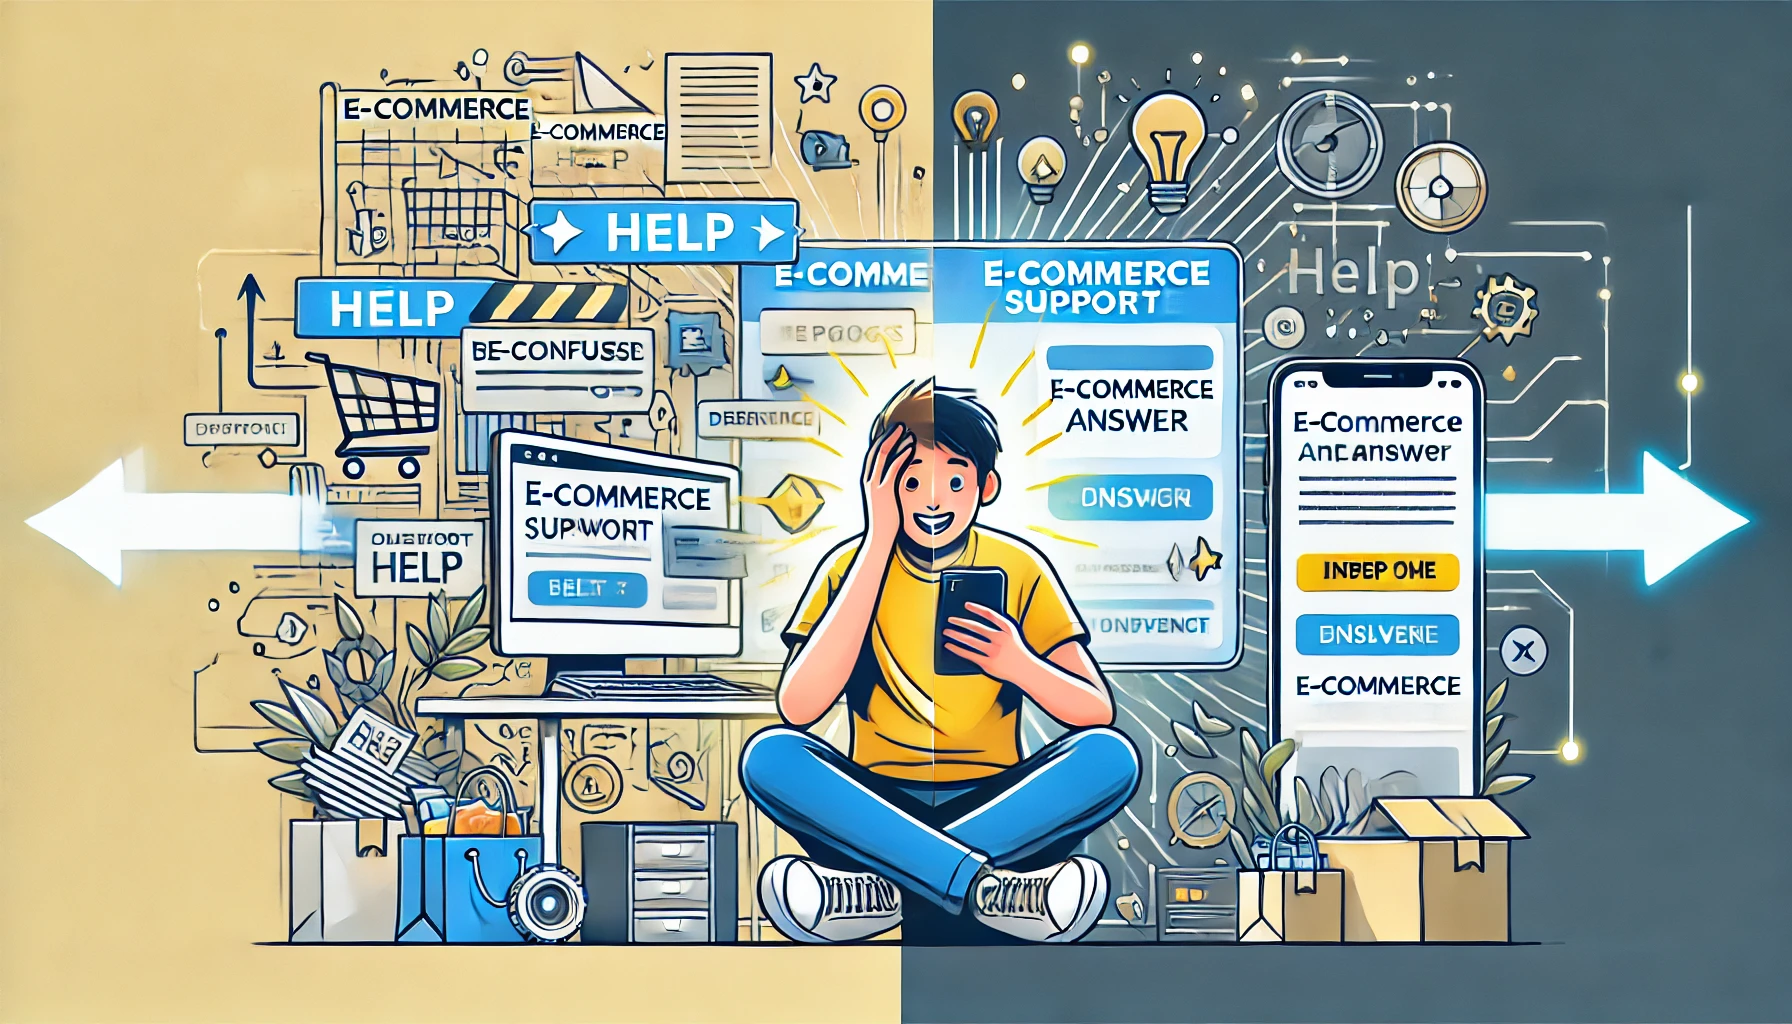

In [42]:
import requests
from IPython.display import Image, display

# Get the raw image URL.  You can do this in two ways:

# 1. The most reliable way: Go to the image on GitHub, right-click, and select "Copy image address" or "Copy image link".  This will give you a URL like this (but with your actual image):
raw_image_url = "https://raw.githubusercontent.com/navneetkrc/Open_LLM_Apps/bddf71e9bb8407dda9329e7c52679288ad746f34/dalle_improved_search.png"  # Replace with your actual raw URL


# 2.  If you know the GitHub URL, you can often construct it manually by replacing "blob" with "raw":
github_image_url = "https://github.com/navneetkrc/Open_LLM_Apps/blob/bddf71e9bb8407dda9329e7c52679288ad746f34/dalle_improved_search.png"
raw_image_url_manual = github_image_url.replace("/blob/", "/raw/")

# Now display the image (using either raw_image_url or raw_image_url_manual):

try:
  response = requests.get(raw_image_url, stream=True)
  response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)
  image = Image(response.content)
  display(image)

except requests.exceptions.RequestException as e:
  print(f"Error displaying image: {e}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


# # 1. The most reliable way: Go to the image on GitHub, right-click, and select "Copy image address" or "Copy image link".  This will give you a URL like this (but with your actual image):
# raw_image_url = "https://raw.githubusercontent.com/navneetkrc/Open_LLM_Apps/bddf71e9bb8407dda9329e7c52679288ad746f34/dalle_improved_search.png"  # Replace with your actual raw URL
# #OR (less robust to network issues, but simpler for known good URLs)
# display(Image(raw_image_url))

In [43]:
from IPython.display import HTML

# 1. The most reliable way: Go to the image on GitHub, right-click, and select "Copy image address" or "Copy image link".  This will give you a URL like this (but with your actual image):
raw_image_url = "https://raw.githubusercontent.com/navneetkrc/Open_LLM_Apps/bddf71e9bb8407dda9329e7c52679288ad746f34/dalle_improved_search.png"  # Replace with your actual raw URL

html_code = f"""
<div>
  <img src="{raw_image_url}" alt="Improved Search" width="1000">  <p>This image demonstrates the improved search experience... (your description here)</p>
</div>
"""

display(HTML(html_code))

In [44]:
!wget https://github.com/navneetkrc/Open_LLM_Apps/blob/bddf71e9bb8407dda9329e7c52679288ad746f34/dalle_improved_search.png

--2025-03-08 21:30:33--  https://github.com/navneetkrc/Open_LLM_Apps/blob/bddf71e9bb8407dda9329e7c52679288ad746f34/dalle_improved_search.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dalle_improved_search.png’

dalle_improved_sear     [ <=>                ] 214.53K  --.-KB/s    in 0.05s   

2025-03-08 21:30:33 (4.15 MB/s) - ‘dalle_improved_search.png’ saved [219674]



Okay, here's a blog post designed for Confluence, focusing on the different types of QA pairs you can generate from support documentation using a Large Language Model (LLM) like Gemini, along with examples and formatting considerations:

---

## Level Up Your Support Docs:  Unlocking the Power of AI-Generated QA Pairs

**Introduction**

Let's face it: traditional support documentation can be... overwhelming.  Long PDFs, endless scrolling, and the frustrating feeling of searching for a needle in a haystack are all too common.  But what if we could make finding answers *instantaneous* and *intuitive*?

That's where AI-powered Question-Answering (QA) pairs come in.  By leveraging a Large Language Model (LLM) like Google's Gemini, we can transform dense technical documentation into a readily accessible knowledge base.  Instead of forcing users to sift through manuals, we can provide direct answers to their specific questions.

This blog post will explore various *types* of QA pairs you can generate, each designed to address different user needs and information-seeking behaviors. We'll use a Samsung Galaxy S25 User Guide as our example document, showcasing the versatility of this approach.  We'll also see how to present these QA pairs in a user-friendly way within Confluence.

**Why Use AI-Generated QA Pairs?**

*   **Improved User Experience:**  Users get direct answers instead of wading through pages of text.
*   **Faster Resolution Times:**  Reduce the time it takes for users (and support agents!) to find solutions.
*   **Increased Self-Service:**  Empower users to solve problems independently, freeing up support resources.
*   **Enhanced Searchability:**  QA pairs create a structured knowledge base that's easily searchable.
*   **Content Repurposing:**  Transform existing documentation into a more dynamic and engaging format.

**Setting the Stage: Our Example Document**
All the following examples use the Samsung Galaxy S25 User Guide as the source document.

**QA Pair Types and Examples**

We'll use a consistent format for each example:

*   **Prompt Type:**  A brief description of the prompt's goal.
*   **Prompt Example:**  The actual prompt we'd feed to the LLM.
*  **Prompt Description:**  Description of the prompt.
*   **Generated QA Pairs:**  A sample of the output from the LLM.
*   **Confluence Formatting Notes:**  Tips for presenting the QA pairs effectively in Confluence.

---

### 1. Simple Question-Answer Pairs

*   **Prompt Type:**  General informative Q&A pairs.
*   **Prompt Example:**
```
Generate fundamental Q&A pairs from Samsung support docs covering:
Key features Basic troubleshooting Usage guidelines
Use consumer-friendly language with concise answers (1-2 sentences).
Text: {text}
```
* **Prompt Description:**
This prompt generates basic Q&A covering key features, troubleshooting, and usage, using consumer-friendly language.
*   **Generated QA Pairs:**

    *   **Q: What is Galaxy AI?**
        *   A: Galaxy AI enhances device usage with intelligent features like real-time call translation and image editing.

    *   **Q: What is Smart Switch and how do I use it?**
        *   A: Smart Switch lets you easily transfer data from your old phone to your new Samsung device via USB cable or wirelessly.

    *   **Q: My phone won't turn on. What should I do?**
        *   A: Try charging your phone for at least a few minutes. If it still doesn't turn on, force restart by pressing and holding the Side button and Volume Down button simultaneously.

    *   **Q: How do I take a screenshot?**
        *    A: Press the Side button and the Volume Down button simultaneously, or swipe the edge of your hand across the screen.

*   **Confluence Formatting Notes:**

    *   Use the **Expand** macro to create collapsible sections for each QA pair. This keeps the page clean and allows users to focus on the questions relevant to them.
    *   Use **bold** text for the questions to make them stand out.
    *   Consider using a two-column layout (using the `/columns` macro) to present questions and answers side-by-side for a more compact view.

---

### 2. Structured QA Pairs (Problem-Solution Focus)

*   **Prompt Type:**  Problem-solution focused pairs.
*   **Prompt Example:**

```
Create problem-solution pairs from Samsung docs. Format:
Question: [Issue description]
Answer: [Step-by-step fix]
Include severity indicators (!) for critical issues.
Text: {text}
```

* **Prompt Description:**
This prompts for problem-solution Q&A with severity indicators for critical issues.
*   **Generated QA Pairs:**

    *   **Question:** ! [Device doesn't turn on]
        *   **Answer:** When the battery is completely discharged, your device will not turn on. Fully charge the battery before turning on the device.

    *   **Question:** [Others cannot hear you speaking on a call]
        *   **Answer:**
            1.  Ensure that you are not covering the built-in microphone.
            2.  Ensure that the microphone is close to your mouth.
            3.  If you are using headphones, ensure that they are properly connected.

    *   **Question:** [The battery does not charge properly (For Samsung-approved chargers)]
        *   **Answer:**
            1.  Ensure that the charger is connected properly.
            2.  Visit a Samsung Service Centre or an authorised service centre and have the battery replaced.

*   **Confluence Formatting Notes:**

    *   Use a table to clearly separate the "Question" (problem description) and "Answer" (step-by-step fix).
    *   Use the **Status** macro (with a red color) to visually represent the "!" severity indicator for critical issues.
    *   For multi-step answers, use a numbered list within the "Answer" cell of the table.

---

### 3. Step-by-Step Procedural Guides

*   **Prompt Type:**  Procedural guidance pairs.
*   **Prompt Example:**

```
Extract step-by-step procedures and generate Q&A pairs with:
Sequential questions Tool requirements Time estimates
Format steps with numbered sub-items.
Text: {text}
```

* **Prompt Description:**
Extracts step-by-step procedures, generating Q&A with questions, tools, and time estimates.

*   **Generated QA Pairs:**

    *   **Procedure:** Charging the Battery
        1.  **Wired Charging:**
            1.  Connect the USB cable to the USB power adapter.
            2.  Plug the cable into the device's multipurpose jack (USB Type-C).
            3.  After fully charging, disconnect the charger from the device.
        2.  **Wireless Charging:**
            1.  Place the center of the device's back on the center of the wireless charger (sold separately).
            2.  After fully charging, disconnect the device from the wireless charger.

    *   **Q&A:**
        *   **Q1:** What is the first step in charging the device via a wired connection?
            *   **A1:** Connect the USB cable to the USB power adapter.
        *   **Q2:** What tools are needed for wired charging?
            *   **A2:** USB cable, USB power adapter.
        *   **Q5:** How long does it take to charge the battery?
            *   **A5:** The estimated charging time will appear on the notification panel. The actual charging time assumes normal conditions.

*   **Confluence Formatting Notes:**

    *   Use a top-level heading for the overall procedure (e.g., "Charging the Battery").
    *   Use subheadings for different methods (e.g., "Wired Charging," "Wireless Charging").
    *   Use numbered lists for each step within a procedure.
    *   Create a separate section for the Q&A, using the Expand macro or a table as described above.

---

### 4. Anticipated User Questions (FAQs)

*   **Prompt Type:** Anticipated user questions.
*   **Prompt Example:**

```
Predict common FAQs from Samsung users based on this text.
Phrase questions as natural customer inquiries.
Include 'Why', 'How', and 'What if' scenarios.
Text: {text}
```
* **Prompt Description:**
Predicts common FAQs, phrased as natural customer inquiries, including 'Why', 'How', and 'What if' scenarios.
*   **Generated QA Pairs:**

    *   "How do I turn my new Galaxy S25 on for the first time?"
    *   "Where is the SIM card slot on my Galaxy S25+?"
    *   "How do I transfer all my stuff from my old phone to my new Galaxy S25?"
    *   "Why isn't my phone charging when I plug it in?"
    *  "What if my phone gets wet? Is it really waterproof?"
    *   "How do I download new apps onto my phone?"
    *   "How can I make contactless payments with my phone?"
    *   "How do I change the wallpaper on my home screen?"
    *    "What if my phone isn't connecting to Wi-Fi?"
    *   "How do I use Call Assist to translate phone calls in real-time?"

*   **Confluence Formatting Notes:**

    *   Use a heading like "Frequently Asked Questions (FAQs)".
    *   Use the Expand macro or a simple bulleted list for each question, followed by the answer.  This format is very common for FAQs.

---

### 5. Troubleshooting Guides

*   **Prompt Type:**  Diagnostic-focused pairs.
*   **Prompt Example:**
```
Create advanced troubleshooting pairs including:
Error symptoms Diagnostic checks Repair procedures
Format solutions with priority levels (Critical/High/Medium).
Text: {text}
```
* **Prompt Description:**
Creates advanced troubleshooting Q&A, with error symptoms, diagnostics, and repair procedures.

*   **Generated QA Pairs:**

    *   **Pair 1: Device Not Turning On**
        *   **Error Symptom:** Device completely unresponsive, screen remains black, no lights or sounds when attempting to power on.
        *   **Diagnostic Checks:**
            1.  **Critical:** Check battery level. Connect the device to a known working charger and power outlet. Allow the device to charge for at least 30 minutes.
            2.  **Critical:** Force Restart.  Press and hold the Side button and Volume Down button simultaneously for more than 7 seconds.
            3.  **Medium:** Check the charging port for debris or damage.  Inspect the USB-C port for bent pins, lint, or other obstructions.
        *   **Repair Procedures:**
            1.  **Critical:** If the device starts after charging, monitor the charging behavior. Replace the charging cable and power adapter if necessary.
            2.  **Critical:** If the device still fails to power on after charging and attempting a force restart, the battery may be faulty or there may be a hardware issue.  Seek professional repair at a Samsung Service Centre or authorized repair provider.
            3.  **Medium:** If the charging port is damaged, professional repair/replacement is necessary. *Do not attempt to repair the charging port yourself.*

*   **Confluence Formatting Notes:**

    *   Use a heading like "Troubleshooting".
    *   Use a table with columns for "Error Symptom," "Diagnostic Checks," and "Repair Procedures."
    *   Use the Status macro (with appropriate colors) to indicate priority levels (Critical, High, Medium).
    *   Use numbered lists within the "Diagnostic Checks" and "Repair Procedures" columns.

---
### 6. Feature Explanation

*   **Prompt Type:** Technology deep-dive pairs.
*   **Prompt Example:**
```
Explain Samsung technologies with Q&A pairs covering:
Technical specifications Use cases Compatibility notes
Include diagrams in markdown when relevant.
Text: {text}
```
*   **Prompt Description:**
Explains Samsung technologies with Q&A, covering specs, use cases, and compatibility.

*   **Generated QA Pairs:**

    *   **1. Display Technology (Motion Smoothness):**
        *   **Q:** What is "Motion Smoothness" on Samsung phones, and what are the technical differences between the available options?
        *   **A:** Motion Smoothness refers to the refresh rate of the display, measured in Hertz (Hz). A higher refresh rate makes motion appear smoother, especially when scrolling or playing games.
            *   **Adaptive:** Automatically adjusts the screen refresh rate to a higher one (likely 120Hz) for smoother animations and scrolling, and a lower one (likely 60Hz) to conserve battery when the screen content is static.
            *   **Standard:** Uses a standard refresh rate (likely 60Hz) to conserve battery power.
            * Use Cases
                *   **Adaptive:** Best for gaming, watching fast-paced videos, or any scenario where smooth visuals are important.
                *   **Standard:** Suitable for everyday use, reading, or when battery life is a priority.
*   **Confluence Formatting Notes:**
    * Use headings to group related technology explanations.
    * bold the Question.
    * Use bullted points and lists to make it easy to read

---

### 7. Setup/Installation Guides
* **Prompt type:** Installation/Configuration Pairs
* **Prompt Example:**
```
Generate setup-related Q&A with:
Pre-installation checks Configuration options Post-setup tests
Include recommended settings for different user types.
Text: {text}
```
*   **Prompt Description:**
Generates Q&A for setup, with pre-installation, configuration, and post-setup steps.

*   **Generated QA Pairs:**
    *   **I. Pre-Installation Checks Q&A:**
        *   **Q: What should I do before using the device for the first time?**
            *   **A:** Charge the battery fully. It's recommended to charge it before first use, especially if it's been unused for a while.
        *   **Q: Are there any potential problems when the sim tray is wet?**
           *   **A:** Yes, if you insert the SIM tray while it is wet, it may cause damage to your device. Ensure that the tray is completely dry before inserting it.
        *   **Q: What type of SIM card does this device use?**
            *   **A:** It uses a nano-SIM card. Additionally, it may support eSIM functionality depending on the region, carrier, and model.

    *   **II. Configuration Options Q&A:**
        *   **Q: How do I turn on the device for the first time?**
            *   **A:** Press and hold the Side button for a few seconds.
        *   **Q: How do I complete the initial setup?**
            *   **A:** Follow the on-screen instructions after turning on the device. You'll be prompted to connect to a Wi-Fi network, sign in to your Google account, and set up other preferences.
        *  **Q: How do I transfer data from my old device?**
            * **A:** Use Smart Switch. Go to Settings > Accounts and backup > Transfer data for device setup.  You can transfer data wirelessly or using a USB cable.
        *   **Q: How do I set up a Samsung account?**
            *   **A:** Go to Settings > Sign in to your Galaxy (or Accounts and backup > Manage accounts > Add account > Samsung account). Follow the on-screen instructions.
        *   **Q: How do I download an eSIM?**
            *   **A:** Open Settings and tap Connections → SIM manager → Add eSIM.  You may need a QR code from your carrier.
    *  **III. Post-Setup Tests & Verification Q&A:**
        *   **Q: How do I verify that Wi-Fi is working correctly?**
            *   **A:** Go to Settings > Connections > Wi-Fi. Ensure Wi-Fi is turned on and connected to your network. Open a web browser and try loading a website.
        *   **Q: How do I test the screen touch responsiveness?**
            *   **A:** Open the dialer app and type `#0#`. The options for different tests are available.
        *   **Q: How can I reset my device?**
            *   **A:** To reset your device, perform a factory data reset. Open Settings and tap General management → Reset → Factory data reset. *Warning: This will erase all data on your device.*

*   **Confluence Formatting Notes:**
    * Use headings to group Steps and sections.
    * bold the Question.
    * Use bullted points and lists to make it easy to read

---
### 8. Error Code Explanations
* **Prompt type:** Error code explanation.
* **Prompt Example:**
```
Create error code Q&A with:
Code interpretations Immediate actions
Format codes in bold with severity colors (

).
Text: {text}
```
*   **Prompt Description:**
Generates Q&A for errors, with interpretations, actions, and colored severity indicators.
*   **Generated QA Pairs:**

    *   ### **ERROR 001: Device Overheating**
        *   **Code Interpretation:** The device has exceeded a safe operating temperature threshold. This can be triggered by intensive use, high ambient temperatures, or a potential hardware issue.
        *   **Immediate Actions:**
            1.  Stop using the device immediately.
            2.  Disconnect the charger if connected.
            3.  Close all running apps.
            4.  Move the device to a cooler environment.
            5.  Allow the device to cool down completely before resuming use.
        *   **Service Triggers:**
            *   If the overheating persists even with minimal use and in a cool environment.
            *   If the device displays warning messages about overheating despite not being used heavily.
            *   If the device shuts down unexpectedly due to overheating.
            *   If physical damage to the device is suspected to be the cause of the overheating.

*   **Confluence Formatting Notes:**
    * Use headings to group Steps and sections.
    * bold the Question.
    * Use bullted points and lists to make it easy to read

---

### 9. Safety and Compliance

* **Prompt Type:**  Safety/compliance pairs
*   **Prompt Example:**

```
Generate safety Q&A covering:
Hazard prevention Compliance standards Recall information
Use warning boxes for critical items.
Text: {text}
```
*   **Prompt Description:**
Generates safety Q&A, covering hazards, compliance, and recalls, with warning boxes for critical items.

*   **Generated QA Pairs:**
    *   **Q: Is it safe to use the speakers close to my ears?**
        *   A: When using the speakers, such as when playing media files or using speakerphone, do not place the device close to your ears. Prolonged exposure to loud audio can damage your hearing.
    *   **Q: What should I do if the glass or acrylic body of the device is broken?**
        *   A: If you use the device with its glass or acrylic body broken, there may be a risk of injury. Use the device only after it has been repaired by a Samsung Service Centre.
    *  **Q: What should I do if dust or foreign materials enter the microphone, speaker, or receiver?**
        *   A: If dust or foreign materials enter the microphone, speaker, or receiver, or if these parts are covered, the device's volume or call quality may be affected.  Do not insert sharp objects into the microphone, speaker, or receiver.
    *    **Q: Can metallic stickers or covers affect connectivity or battery life?**
        *    A: Yes, connectivity problems and battery drain may occur if you attach metallic stickers on the antenna area, use metallic phone cases, or non-Samsung-approved covers.

*   **Confluence Formatting Notes:**
    * Use headings to group Steps and sections.
    * bold the Question.
    * Use bullted points and lists to make it easy to read
---
### 10. Device Compatibility
* **Prompt Type:** Device compatibility pairs
* **Prompt Example:**
```
Create compatibility Q&A with:
Supported models - Version requirements - Regional variations
Present compatibility as tables when possible.
Text: {text}
```
*   **Prompt Description:**
Creates Q&A on compatibility, with models, versions, and regional variations, using tables when possible.

*   **Generated QA Pairs:**

    *   **Supported Models:** SM-S931B, SM-S931B/DS, SM-S936B, SM-S936B/DS, SM-S938B, SM-S938B/DS.
    *   **Version Requirements:** The text mentions *English 01/2025 Rev1 0*, which indicates software/documentation versioning, but doesn't explicitly list minimum OS requirements for features.
    *   **Regional Variations:** The document mentions that some features are region-dependent.

    *   **Compatibility Q&A:**
        *   **General Device Support**
            *   **Q: Which phone models does this user guide cover?**
                *   **A:** This user guide is applicable to the following Samsung Galaxy models:
                    *   SM-S931B
                    *   SM-S931B/DS
                    *   SM-S936B
                    *   SM-S936B/DS
                    *   SM-S938B
                    *   SM-S938B/DS

*   **Confluence Formatting Notes:**

    *   Use a table to clearly present compatibility information.  Columns could include "Model," "Supported Feature," "Minimum OS Version," "Regional Availability," and "Notes."
    *   If there are many compatibility variations, consider creating separate tables for different feature categories (e.g., "Connectivity Features," "Multimedia Features").

---
### 11. Preventive Maintenance
*   **Prompt Type:** Preventive care pairs.
*   **Prompt Example:**

```
Generate maintenance Q&A including:
Service intervals - Cleaning procedures - Part replacements
Add maintenance checklists with timelines.
Text: {text}
```

*   **Prompt Description:**
Generates maintenance Q&A, including intervals, cleaning, replacements, and checklists with timelines.

* **Generated QA Pairs**
     *   **Q: How often should I service my Galaxy S25 device?**
        *   **A:** While there are no specific "service intervals" in the traditional sense for smartphones (like with a car), regular maintenance is crucial for optimal performance and longevity.
            *   Check for software updates regularly (Settings > Software update).
            *   Monitor battery health and performance (Settings > Battery > Battery Information).
            *   Utilize the Device Care feature to optimize performance (Settings > Device care).

    *   **Q: What's the best way to clean my Galaxy S25 device?**
        *   **A:**
            1.  **Power Off:** Turn off your device before cleaning.
            2.  **Microfiber Cloth:** Use a soft, lint-free microfiber cloth to wipe the exterior surfaces (screen, back, sides). Avoid abrasive materials like paper towels.
            3.  **Avoid Liquids:** Do not spray liquids directly onto the device. If necessary, *lightly* dampen the microfiber cloth with distilled water. *Never* use harsh chemicals, solvents, or abrasive cleaners.
            4.  **Ports and Openings:** Use a dry, soft brush (like a clean toothbrush) or compressed air to gently remove dust and debris from the charging port, speaker grilles, and other openings.
            5.  **Camera Lens:** Clean the camera lens with a lens cloth designed for optics. Avoid abrasive materials.
            6.  **S Pen (S25 Ultra):** Clean the S Pen with a dry cloth. Ensure no debris is lodged in the S Pen slot.

*   **Confluence Formatting Notes:**

    *   Use a table to organize maintenance tasks, intervals, and any specific instructions.
    *   Include a "Notes" column for additional tips or warnings.
    *   Consider using the Checklist macro for recurring tasks.

---
### 12. Warranty and Service

*   **Prompt Type:** Warranty/service pairs
*   **Prompt Example:**

```
Create warranty Q&A covering:
Coverage details Claim processes Void conditions
Include regional policy variations.
Text: {text}
```
*Prompt Description*
Creates Q&A about warranties, claims, void conditions, and regional variations.
*Confluence Formating Notes*
*   Organize information using headings and subheadings (e.g., "Warranty Coverage," "Making a Claim," "Warranty Void Conditions").
*   Use bullet points to list key details.
*   If regional variations are extensive, create separate sections or tables for each region.
*   Provide links to the official Samsung warranty information page for your target region.

---

**Conclusion**

By strategically using different types of prompts, you can leverage the power of LLMs to create a comprehensive and user-friendly QA knowledge base from your existing support documentation.  This not only improves the user experience but also streamlines support operations and empowers users to find answers quickly and efficiently. Remember to always review and refine the AI-generated content to ensure accuracy and clarity.  This approach allows you to transform static documentation into a dynamic, searchable, and highly effective self-service resource.
